# Data Mining Project

In this project, I aimed to analyze greenhouse gas emission and distribution of cars registered in the traffic by fuel type in Turkey. Also I aimed to determine a relation and what kind of relation between them.
I used my time interval as between 2004 and 2019 because it is the intersection of their time intervals.

# Greenhouse Gas Emission Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
data1 = pd.read_csv("sera_sonuclar.csv",delimiter=';')
data2 = pd.read_csv("araclar_sonuclar.csv",delimiter=';')
data1

,Year,Total,CO2,CH4,N2O,F
0,1990,219.6,151.5,42.5,25.0,0.6
1,1991,227.0,158.0,43.4,24.7,0.9
2,1992,233.2,163.9,43.3,25.3,0.7
3,1993,240.5,171.0,43.1,26.0,0.4
4,1994,234.5,167.4,42.8,23.6,0.7
5,1995,248.0,180.9,42.6,23.9,0.6
6,1996,267.6,199.5,43.0,24.5,0.6
7,1997,278.9,212.0,42.2,24.0,0.6
8,1998,280.4,212.0,42.4,25.3,0.6
9,1999,277.8,207.8,43.8,25.6,0.6


Setting time interval of my first data to between 2004 and 2019

In [2]:
data1 = data1[14:].reset_index()
data1.Year = data1.Year.astype(float)
data1 = data1.drop(columns=['index'])
data1

,Year,Total,CO2,CH4,N2O,F
0,2004.0,314.8,244.5,43.5,25.4,1.5
1,2005.0,337.3,264.2,45.2,26.2,1.7
2,2006.0,358.6,281.6,46.6,28.4,1.9
3,2007.0,391.7,312.7,49.0,27.6,2.3
4,2008.0,387.9,309.3,49.9,26.2,2.4
5,2009.0,395.8,315.4,49.6,28.5,2.4
6,2010.0,399.1,314.4,51.4,29.8,3.6
7,2011.0,428.1,339.5,53.7,30.9,4.0
8,2012.0,447.6,353.7,57.1,32.1,4.7
9,2013.0,439.7,345.2,55.5,34.1,4.8


In [3]:
data1.describe()

,Year,Total,CO2,CH4,N2O,F
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,2011.500000,430.337500,341.793750,52.393750,32.21875,3.918750
std,4.760952,65.098509,54.410299,4.874761,5.07848,1.647308
min,2004.000000,314.800000,244.500000,43.500000,25.40000,1.500000
25%,2007.750000,390.750000,311.850000,49.450000,28.20000,2.375000
50%,2011.500000,433.900000,342.350000,52.650000,31.50000,4.350000
75%,2015.250000,479.700000,385.800000,55.900000,35.97500,5.350000
max,2019.000000,525.000000,425.300000,60.300000,40.20000,6.200000


In [4]:
data1.shape

(16, 6)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    16 non-null     float64
 1   Total   16 non-null     float64
 2   CO2     16 non-null     float64
 3   CH4     16 non-null     float64
 4   N2O     16 non-null     float64
 5   F       16 non-null     float64
dtypes: float64(6)
memory usage: 896.0 bytes


Found which greenhouse gas emission has the most total amount 

Text(0, 0.5, 'Amount of Gas')

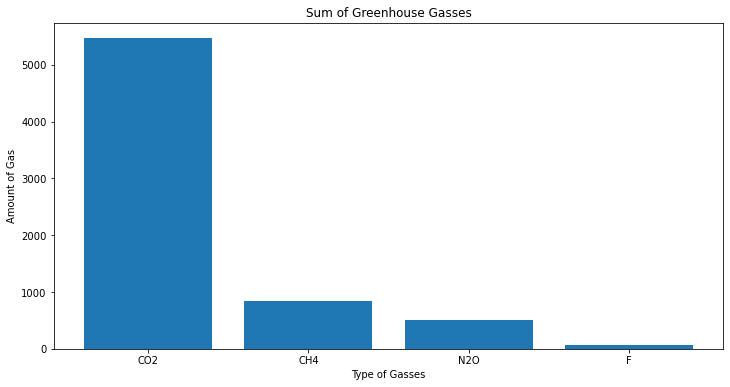

In [6]:
plt.figure(figsize=(12,6))
sums = [data1['CO2'].sum(),data1['CH4'].sum(),data1['N2O'].sum(),data1['F'].sum()]
names = ['CO2','CH4','N2O','F']
plt.bar(names,sums)
plt.title('Sum of Greenhouse Gasses')
plt.xlabel('Type of Gasses')
plt.ylabel('Amount of Gas')

Observe greenhouse gas emission amount for each year by pie chart

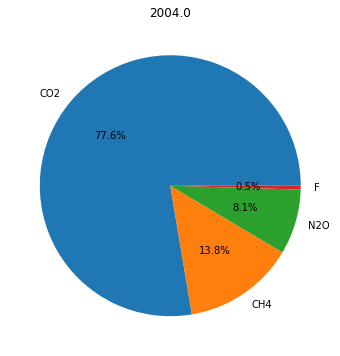

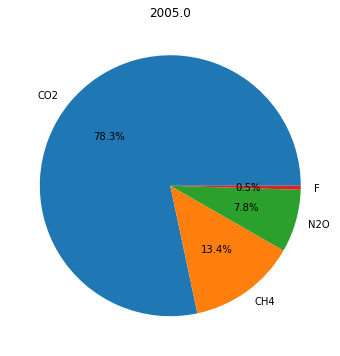

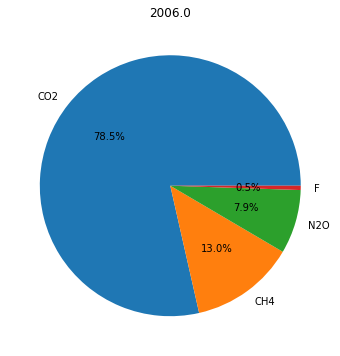

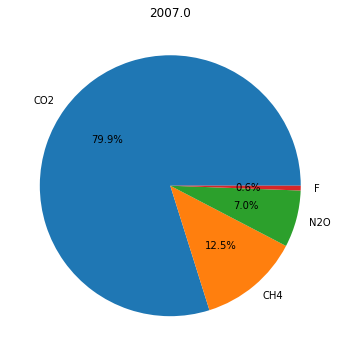

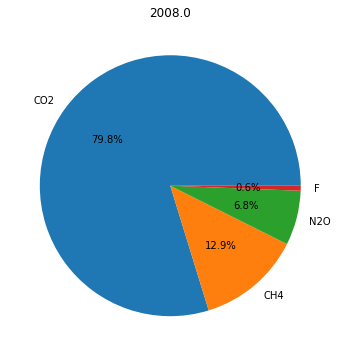

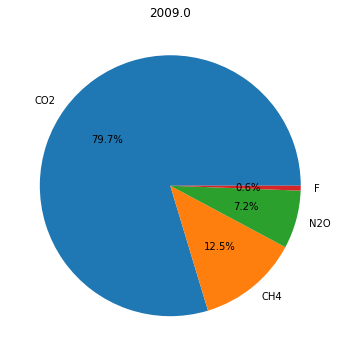

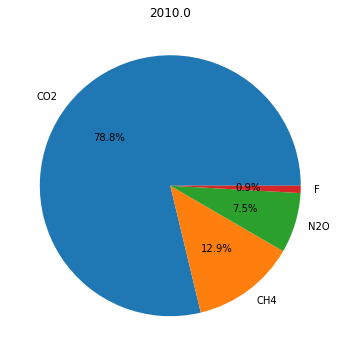

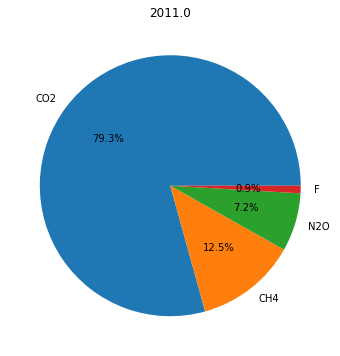

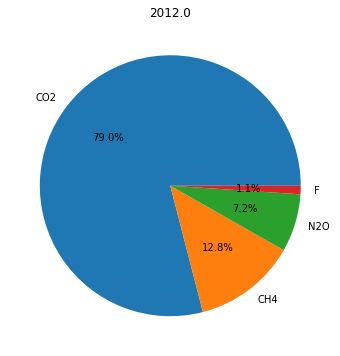

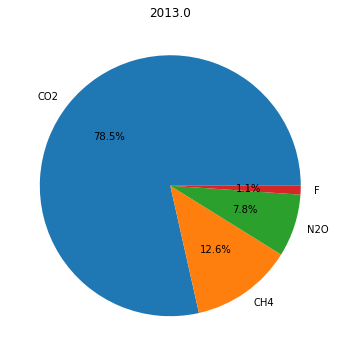

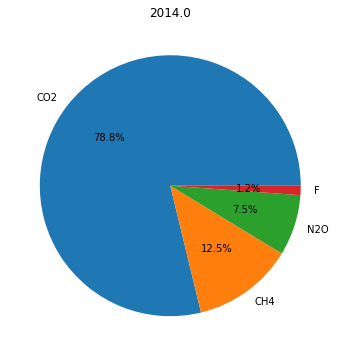

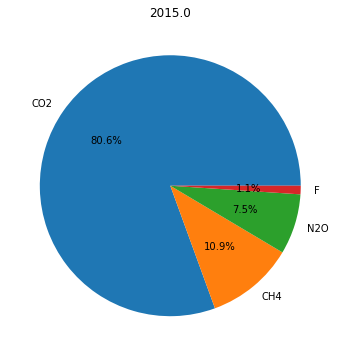

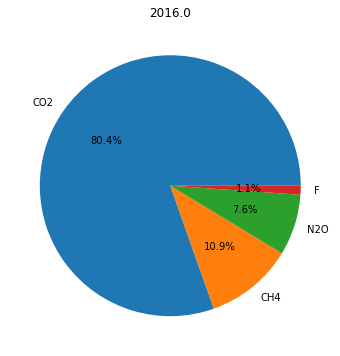

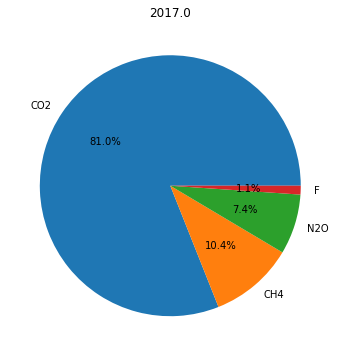

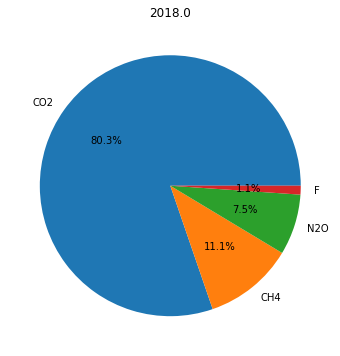

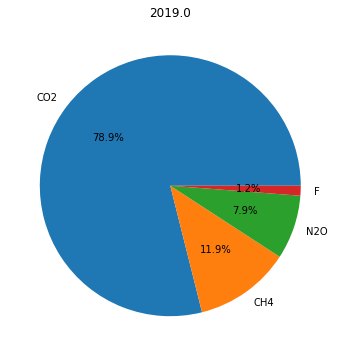

In [7]:
for i in range(0,16):
    fig1, ax1 = plt.subplots( figsize=(10, 6))
    ax1.pie(data1.loc[i][2:],labels=names,autopct='%1.1f%%')
    plt.title(data1.loc[i]['Year'])
    

Observe correlation between greenhouse gasses. How they affect each other?

In [8]:
data1[['CO2','CH4','N2O','F']].corr()
#there is a strong correlation between Co2 and other greenhouse gasses

,CO2,CH4,N2O,F
CO2,1.000000,0.857205,0.951677,0.943653
CH4,0.857205,1.000000,0.846521,0.926016
N2O,0.951677,0.846521,1.000000,0.960450
F,0.943653,0.926016,0.960450,1.000000


All greenhouse gas emissions has strong correlation and positively affect each other as an increase or decrease. I wanted to take look to how Co2 gas emission affects other gas emissions. Co2 and other greenhouse gasses highly correlated.

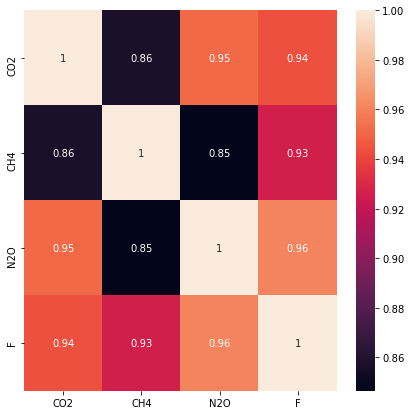

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(data1[['CO2','CH4','N2O','F']].corr(), annot=True)
plt.show()

I wanted to predict Co2 emission for next 3 years, I used linear regression, polynomial regression and gradient descent methods to determine predicted Co2 emission.

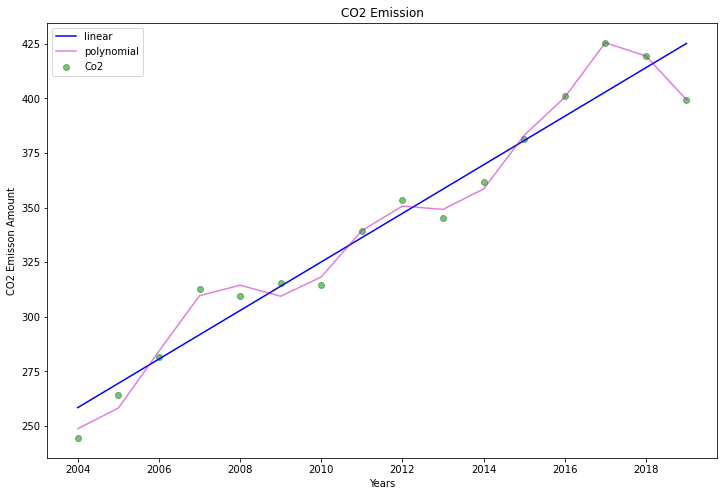

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(12, 8))
carbon_ = np.array(data1['CO2'])
years_ = 1+np.arange(carbon_.shape[0])
yea = np.array(data1['Year'])
lin_reg_ = LinearRegression()  #linear reg
lin_reg_.fit(years_.reshape(-1,1), carbon_.reshape(-1,1))

poly_reg_ = PolynomialFeatures(degree=14) #pol reg
X_poly_ = poly_reg_.fit_transform(years_.reshape(-1,1))
pol_reg_ = LinearRegression()
pol_reg_.fit(X_poly_, carbon_.reshape(-1,1))
linear_pred_ = lin_reg_.predict(years_.reshape(-1,1))
poly_pred_ = pol_reg_.predict(poly_reg_.fit_transform(years_.reshape(-1,1)))


plt.scatter(yea, carbon_,c='g',alpha=0.5)
plt.plot(yea, linear_pred_, '-', color='blue')
plt.plot(yea, poly_pred_, '-', color='m',alpha=0.5)
plt.title('CO2 Emission')
plt.xlabel('Years')
plt.ylabel('CO2 Emisson Amount')
plt.legend(['linear', 'polynomial', 'Co2'])

plt.show()

In [11]:
print('Mean Squared Error Linear:', mean_squared_error(carbon_, linear_pred_))
print('Mean Squared Error Poly:', mean_squared_error(carbon_, poly_pred_))
print('Linear Model Fit Score:', lin_reg_.score(years_.reshape(-1,1), carbon_.reshape(-1,1)))
print('Polynomial Model Fit Score:', pol_reg_.score(X_poly_, carbon_))

Mean Squared Error Linear: 149.67075091911775
Mean Squared Error Poly: 11.657052112072474
Linear Model Fit Score: 0.9460733505119993
Polynomial Model Fit Score: 0.9957999424773996


Polynomial error is lesser than linear error and polynomial fit score is bigger than linear one. That's why I choosed polynomial regression to predict. 

In [12]:
def linear_gradient(x, t, m, b):
    
    predicted = m * x + b              
    error = (predicted-t)             
    squared_error = error ** 2          
    print("Error:",np.mean(squared_error))
    grad = np.array([2 * error * x, 2 * error])    
    return grad

m0,b0-starting point (-0.2455050719344274, 0.9695322084800115)
Error: 120480.6770481769
v: (-0.2455050719344274, 0.9695322084800115) grad: [-6312.35240091  -685.82202181]
0 (-0.2455050719344274, 0.9695322084800115)
Error: 83964.17990595417
v: (-0.2455050719344274, 0.9695322084800115) grad: [-5120.28352757  -577.14038695]
1 (6.06684732897315, 1.6553542302859368)
Error: 59915.67351728821
v: (6.06684732897315, 1.6553542302859368) grad: [-4152.97912133  -488.9412862 ]
2 (11.18713085654031, 2.2324946172328213)
Error: 44076.749514421135
v: (11.18713085654031, 2.2324946172328213) grad: [-3368.06002378  -417.36275857]
3 (15.340109977874313, 2.7214359034371705)
Error: 33643.44860633083
v: (15.340109977874313, 2.7214359034371705) grad: [-2731.13763244  -359.27101265]
4 (18.708170001653386, 3.1387986620064328)
Error: 26769.49701380308
v: (18.708170001653386, 3.1387986620064328) grad: [-2214.30728796  -312.12313087]
5 (21.439307634090092, 3.4980696746543125)
Error: 22239.211298803973
v: (21.439307

v: (31.696451812197484, 21.468610977741562) grad: [   9.27369294 -101.76469993]
166 (31.687173936694947, 21.57042157497872)
Error: 11720.649311994901
v: (31.687173936694947, 21.57042157497872) grad: [   9.26951226 -101.71882331]
167 (31.677900243758355, 21.67218627490495)
Error: 11710.219020696357
v: (31.677900243758355, 21.67218627490495) grad: [   9.26533346 -101.67296737]
168 (31.66863073150216, 21.773905098211248)
Error: 11699.798131452786
v: (31.66863073150216, 21.773905098211248) grad: [   9.26115655 -101.6271321 ]
169 (31.659365398041665, 21.87557806557929)
Error: 11689.386635789011
v: (31.659365398041665, 21.87557806557929) grad: [   9.25698152 -101.5813175 ]
170 (31.650104241493025, 21.977205197681425)
Error: 11678.984525237483
v: (31.650104241493025, 21.977205197681425) grad: [   9.25280837 -101.53552355]
171 (31.640847259973246, 22.07878651518068)
Error: 11668.591791338296
v: (31.640847259973246, 22.07878651518068) grad: [   9.24863711 -101.48975025]
172 (31.631594451600176,

v: (30.568541277146387, 33.84571661708413) grad: [  8.76544798 -96.18748315]
291 (30.559771875829583, 33.941947482138474)
Error: 10487.10828866211
v: (30.559771875829583, 33.941947482138474) grad: [  8.76149642 -96.1441208 ]
292 (30.551006427853096, 34.038134965285096)
Error: 10477.789933759796
v: (30.551006427853096, 34.038134965285096) grad: [  8.75754664 -96.10077799]
293 (30.54224493143472, 34.13427908608102)
Error: 10468.479978592692
v: (30.54224493143472, 34.13427908608102) grad: [  8.75359865 -96.05745473]
294 (30.533487384793048, 34.23037986407447)
Error: 10459.178415589126
v: (30.533487384793048, 34.23037986407447) grad: [  8.74965243 -96.014151  ]
295 (30.524733786147483, 34.32643731880484)
Error: 10449.885237184248
v: (30.524733786147483, 34.32643731880484) grad: [  8.74570799 -95.97086679]
296 (30.51598413371822, 34.42245146980272)
Error: 10440.600435820026
v: (30.51598413371822, 34.42245146980272) grad: [  8.74176533 -95.92760209]
297 (30.507238425726268, 34.51842233658991

Error: 9211.813518789755
v: (29.320953019857786, 47.53610355381424) grad: [  8.20327534 -90.01849195]
438 (29.312746044729536, 47.626162645369035)
Error: 9203.644737872997
v: (29.312746044729536, 47.626162645369035) grad: [  8.19957721 -89.97791065]
439 (29.30454276939384, 47.716181137317896)
Error: 9195.483320444477
v: (29.30454276939384, 47.716181137317896) grad: [  8.19588075 -89.93734764]
440 (29.29634319218279, 47.80615904796357)
Error: 9187.329259866614
v: (29.29634319218279, 47.80615904796357) grad: [  8.19218596 -89.89680291]
441 (29.288147311429228, 47.89609639560054)
Error: 9179.182549507801
v: (29.288147311429228, 47.89609639560054) grad: [  8.18849284 -89.85627647]
442 (29.279955125466753, 47.98599319851504)
Error: 9171.043182742422
v: (29.279955125466753, 47.98599319851504) grad: [  8.18480138 -89.8157683 ]
443 (29.271766632629713, 48.07584947498508)
Error: 9162.911152950826
v: (29.271766632629713, 48.07584947498508) grad: [  8.18111158 -89.77527838]
444 (29.26358183125321

586 (28.138021147942062, 60.516984827507095)
Error: 8072.383840726544
v: (28.138021147942062, 60.516984827507095) grad: [  7.67023735 -84.16920933]
587 (28.130347451209275, 60.601191998337065)
Error: 8065.2421625214265
v: (28.130347451209275, 60.601191998337065) grad: [  7.66677952 -84.13126495]
588 (28.12267721386141, 60.685361207669835)
Error: 8058.106921955416
v: (28.12267721386141, 60.685361207669835) grad: [  7.66332326 -84.09333767]
589 (28.11501043433894, 60.76949247261885)
Error: 8050.9781132255
v: (28.11501043433894, 60.76949247261885) grad: [  7.65986855 -84.05542749]
590 (28.10734711108304, 60.85358581028985)
Error: 8043.855730533905
v: (28.10734711108304, 60.85358581028985) grad: [  7.6564154 -84.0175344]
591 (28.099687242535584, 60.93764123778086)
Error: 8036.739768088088
v: (28.099687242535584, 60.93764123778086) grad: [  7.6529638  -83.97965839]
592 (28.092030827139155, 61.02165877218219)
Error: 8029.6302201007165
v: (28.092030827139155, 61.02165877218219) grad: [  7.649

728 (27.082270807234213, 72.1022418932375)
Error: 7120.0845441901365
v: (27.082270807234213, 72.1022418932375) grad: [  7.19450831 -78.94880547]
729 (27.07507305409638, 72.18122630572805)
Error: 7113.80128595476
v: (27.07507305409638, 72.18122630572805) grad: [  7.19126495 -78.9132145 ]
730 (27.06787854578298, 72.26017511119696)
Error: 7107.523691563058
v: (27.06787854578298, 72.26017511119696) grad: [  7.18802305 -78.87763957]
731 (27.060687280831214, 72.33908832569625)
Error: 7101.251755909535
v: (27.060687280831214, 72.33908832569625) grad: [  7.18478261 -78.84208069]
732 (27.05349925777894, 72.41796596527072)
Error: 7094.985473893303
v: (27.05349925777894, 72.41796596527072) grad: [  7.18154364 -78.80653783]
733 (27.046314475164678, 72.49680804595793)
Error: 7088.724840418067
v: (27.046314475164678, 72.49680804595793) grad: [  7.17830612 -78.771011  ]
734 (27.039132931527597, 72.57561458378822)
Error: 7082.469850392131
v: (27.039132931527597, 72.57561458378822) grad: [  7.17507006 

853 (26.207240570986944, 81.70437019604694)
Error: 6376.9934289296925
v: (26.207240570986944, 81.70437019604694) grad: [  6.80021312 -74.62201432]
854 (26.200437290879588, 81.77902586594807)
Error: 6371.380006590445
v: (26.200437290879588, 81.77902586594807) grad: [  6.79714751 -74.58837392]
855 (26.193637077763988, 81.85364788027123)
Error: 6365.771644292565
v: (26.193637077763988, 81.85364788027123) grad: [  6.79408328 -74.55474868]
856 (26.186839930257513, 81.92823625418869)
Error: 6360.168337474841
v: (26.186839930257513, 81.92823625418869) grad: [  6.79102043 -74.5211386 ]
857 (26.18004584697815, 82.00279100286593)
Error: 6354.570081580164
v: (26.18004584697815, 82.00279100286593) grad: [  6.78795897 -74.48754367]
858 (26.173254826544515, 82.07731214146158)
Error: 6348.976872055548
v: (26.173254826544515, 82.07731214146158) grad: [  6.78489888 -74.45396388]
859 (26.166466867575842, 82.1517996851274)
Error: 6343.388704352097
v: (26.166466867575842, 82.1517996851274) grad: [  6.7818

978 (25.380166387475036, 90.78025363075193)
Error: 5713.120624368685
v: (25.380166387475036, 90.78025363075193) grad: [  6.42752728 -70.53235307]
979 (25.37373596129442, 90.85081779490335)
Error: 5708.1056290942015
v: (25.37373596129442, 90.85081779490335) grad: [  6.42462968 -70.50055633]
980 (25.36730843401901, 90.92135014797154)
Error: 5703.095154428003
v: (25.36730843401901, 90.92135014797154) grad: [  6.42173338 -70.46877392]
981 (25.36088380434194, 90.99185070429728)
Error: 5698.089196295136
v: (25.36088380434194, 90.99185070429728) grad: [  6.4188384  -70.43700584]
982 (25.35446207095694, 91.06231947821487)
Error: 5693.087750624311
v: (25.35446207095694, 91.06231947821487) grad: [  6.41594472 -70.40525208]
983 (25.34804323255834, 91.13275648405218)
Error: 5688.090813347915
v: (25.34804323255834, 91.13275648405218) grad: [  6.41305234 -70.37351263]
984 (25.341627287841042, 91.20316173613058)
Error: 5683.098380401994
v: (25.341627287841042, 91.20316173613058) grad: [  6.41016127 -

1103 (24.598420024097294, 99.35873305976048)
Error: 5120.020947108747
v: (24.598420024097294, 99.35873305976048) grad: [  6.07526649 -66.66682579]
1104 (24.59234201757517, 99.4254299532313)
Error: 5115.540582710146
v: (24.59234201757517, 99.4254299532313) grad: [  6.0725277  -66.63677167]
1105 (24.58626675108368, 99.49209677902606)
Error: 5111.064256993797
v: (24.58626675108368, 99.49209677902606) grad: [  6.06979014 -66.6067311 ]
1106 (24.58019422338759, 99.55873355069959)
Error: 5106.591966319165
v: (24.58019422338759, 99.55873355069959) grad: [  6.06705381 -66.57670407]
1107 (24.57412443325222, 99.6253402818006)
Error: 5102.123707048986
v: (24.57412443325222, 99.6253402818006) grad: [  6.06431872 -66.54669058]
1108 (24.568057379443445, 99.69191698587171)
Error: 5097.659475549281
v: (24.568057379443445, 99.69191698587171) grad: [  6.06158486 -66.51669061]
1109 (24.5619930607277, 99.75846367644944)
Error: 5093.19926818934
v: (24.5619930607277, 99.75846367644944) grad: [  6.05885223 -6

Error: 4522.591639532242
v: (23.7622053963887, 108.53491899177999) grad: [  5.6984619  -62.53196748]
1246 (23.756504364403753, 108.59747916205782)
Error: 4518.649808817321
v: (23.756504364403753, 108.59747916205782) grad: [  5.69589297 -62.5037774 ]
1247 (23.750805902505267, 108.66001112953884)
Error: 4514.711531340564
v: (23.750805902505267, 108.66001112953884) grad: [  5.6933252  -62.47560002]
1248 (23.74511000953462, 108.72251490693718)
Error: 4510.776803899015
v: (23.74511000953462, 108.72251490693718) grad: [  5.69075859 -62.44743535]
1249 (23.739416684333715, 108.78499050696122)
Error: 4506.845623292609
v: (23.739416684333715, 108.78499050696122) grad: [  5.68819313 -62.41928338]
1250 (23.73372592574497, 108.84743794231363)
Error: 4502.917986324165
v: (23.73372592574497, 108.84743794231363) grad: [  5.68562884 -62.39114409]
1251 (23.72803773261133, 108.90985722569134)
Error: 4498.993889799382
v: (23.72803773261133, 108.90985722569134) grad: [  5.68306569 -62.3630175 ]
1252 (23.72

Error: 4214.547304882071
v: (23.30865089507073, 113.51199102148429) grad: [  5.49408683 -60.28926144]
1327 (23.30315433032727, 113.57230747422513)
Error: 4210.883150953632
v: (23.30315433032727, 113.57230747422513) grad: [  5.49161004 -60.26208239]
1328 (23.297660243494242, 113.63259673566111)
Error: 4207.222299960431
v: (23.297660243494242, 113.63259673566111) grad: [  5.48913436 -60.2349156 ]
1329 (23.29216863345458, 113.69285881805038)
Error: 4203.5647489251405
v: (23.29216863345458, 113.69285881805038) grad: [  5.4866598  -60.20776105]
1330 (23.28667949909172, 113.75309373364556)
Error: 4199.910494873122
v: (23.28667949909172, 113.75309373364556) grad: [  5.48418636 -60.18061874]
1331 (23.28119283928959, 113.8133014946937)
Error: 4196.259534832415
v: (23.28119283928959, 113.8133014946937) grad: [  5.48171403 -60.15348867]
1332 (23.275708652932646, 113.8734821134364)
Error: 4192.611865833732
v: (23.275708652932646, 113.8734821134364) grad: [  5.47924281 -60.12637083]
1333 (23.270226

Error: 3791.043545055445
v: (22.656034026477283, 120.67347029983142) grad: [  5.20001277 -57.06224508]
1449 (22.650831668428896, 120.73055828078165)
Error: 3787.761145147005
v: (22.650831668428896, 120.73055828078165) grad: [  5.19766855 -57.0365208 ]
1450 (22.645631655659404, 120.7876205258568)
Error: 3784.4817040537614
v: (22.645631655659404, 120.7876205258568) grad: [  5.19532538 -57.01080813]
1451 (22.64043398711153, 120.84465704665887)
Error: 3781.2052191085845
v: (22.64043398711153, 120.84465704665887) grad: [  5.19298327 -56.98510704]
1452 (22.635238661728472, 120.90166785478465)
Error: 3777.9316876467465
v: (22.635238661728472, 120.90166785478465) grad: [  5.19064222 -56.95941754]
1453 (22.630045678453907, 120.95865296182569)
Error: 3774.6611070059257
v: (22.630045678453907, 120.95865296182569) grad: [  5.18830222 -56.93373963]
1454 (22.62485503623199, 121.01561237936832)
Error: 3771.3934745261977
v: (22.62485503623199, 121.01561237936832) grad: [  5.18596328 -56.90807328]
1455

v: (22.18710297192705, 125.81927665536244) grad: [  4.98870891 -54.74350608]
1541 (22.182112013035532, 125.87404485152896)
Error: 3498.0989706520063
v: (22.182112013035532, 125.87404485152896) grad: [  4.98645995 -54.71882711]
1542 (22.177123304121896, 125.9287883576043)
Error: 3495.08063633052
v: (22.177123304121896, 125.9287883576043) grad: [  4.984212   -54.69415928]
1543 (22.172136844171828, 125.98350718471902)
Error: 3492.0650227906885
v: (22.172136844171828, 125.98350718471902) grad: [  4.98196506 -54.66950257]
1544 (22.167152632171472, 126.03820134399865)
Error: 3489.052127579952
v: (22.167152632171472, 126.03820134399865) grad: [  4.97971914 -54.64485697]
1545 (22.16217066710743, 126.09287084656374)
Error: 3486.0419482479556
v: (22.16217066710743, 126.09287084656374) grad: [  4.97747423 -54.62022248]
1546 (22.157190947966757, 126.14751570352979)
Error: 3483.0344823465593
v: (22.157190947966757, 126.14751570352979) grad: [  4.97523033 -54.59559909]
1547 (22.152213473736968, 126.

1665 (21.58035252434777, 132.47744160110142)
Error: 3143.833896415994
v: (21.58035252434777, 132.47744160110142) grad: [  4.7153026  -51.74328693]
1666 (21.575635095076013, 132.5292082249853)
Error: 3141.1349030993892
v: (21.575635095076013, 132.5292082249853) grad: [  4.71317689 -51.7199605 ]
1667 (21.570919792472047, 132.58095151191904)
Error: 3138.4383427046314
v: (21.570919792472047, 132.58095151191904) grad: [  4.71105214 -51.69664459]
1668 (21.56620661557715, 132.63267147242317)
Error: 3135.744213038637
v: (21.56620661557715, 132.63267147242317) grad: [  4.70892835 -51.67333919]
1669 (21.56149556343303, 132.68436811701352)
Error: 3133.052511910304
v: (21.56149556343303, 132.68436811701352) grad: [  4.70680552 -51.65004429]
1670 (21.556786635081824, 132.73604145620112)
Error: 3130.363237130505
v: (21.556786635081824, 132.73604145620112) grad: [  4.70468364 -51.6267599 ]
1671 (21.552079829566104, 132.78769150049231)
Error: 3127.676386512083
v: (21.552079829566104, 132.7876915004923

v: (21.042598645994993, 138.37847395561946) grad: [  4.47298667 -49.08423743]
1783 (21.0381236419484, 138.4275803307263)
Error: 2841.5766400688217
v: (21.0381236419484, 138.4275803307263) grad: [  4.4709702  -49.06210972]
1784 (21.0336506552817, 138.47666456815173)
Error: 2839.1501069606747
v: (21.0336506552817, 138.47666456815173) grad: [  4.46895463 -49.039992  ]
1785 (21.02917968508544, 138.52572667787564)
Error: 2836.7257611737673
v: (21.02917968508544, 138.52572667787564) grad: [  4.46693998 -49.01788424]
1786 (21.02471073045058, 138.57476666987344)
Error: 2834.3036007364076
v: (21.02471073045058, 138.57476666987344) grad: [  4.46492624 -48.99578645]
1787 (21.020243790468474, 138.62378455411604)
Error: 2831.88362367868
v: (21.020243790468474, 138.62378455411604) grad: [  4.4629134  -48.97369863]
1788 (21.015778864230896, 138.67278034056986)
Error: 2829.465828032451
v: (21.015778864230896, 138.67278034056986) grad: [  4.46090147 -48.95162076]
1789 (21.01131595083003, 138.7217540391

Error: 2561.117381338596
v: (20.507038011572885, 144.25543878795452) grad: [  4.23165902 -46.43603292]
1906 (20.502804444013528, 144.30189576418186)
Error: 2558.9436593259406
v: (20.502804444013528, 144.30189576418186) grad: [  4.22975134 -46.41509906]
1907 (20.498572784991907, 144.34833179710526)
Error: 2556.7718967459887
v: (20.498572784991907, 144.34833179710526) grad: [  4.22784453 -46.39417464]
1908 (20.49434303364763, 144.3947468961662)
Error: 2554.60209183247
v: (20.49434303364763, 144.3947468961662) grad: [  4.22593857 -46.37325964]
1909 (20.490115189120697, 144.44114107080185)
Error: 2552.43424282071
v: (20.490115189120697, 144.44114107080185) grad: [  4.22403347 -46.35235408]
1910 (20.485889250551494, 144.48751433044518)
Error: 2550.2683479476214
v: (20.485889250551494, 144.48751433044518) grad: [  4.22212923 -46.33145794]
1911 (20.481665217080796, 144.53386668452492)
Error: 2548.1044054517106
v: (20.481665217080796, 144.53386668452492) grad: [  4.22022585 -46.31057122]
1912 

v: (20.084898903380548, 148.88777457543574) grad: [  4.04143997 -44.34866762]
2008 (20.080855640665977, 148.9321432449274)
Error: 2347.2114631945337
v: (20.080855640665977, 148.9321432449274) grad: [  4.03961804 -44.32867476]
2009 (20.076814200697672, 148.97649191254624)
Error: 2345.230559881261
v: (20.076814200697672, 148.97649191254624) grad: [  4.03779694 -44.30869092]
2010 (20.07277458265392, 149.0208205873093)
Error: 2343.2514421903934
v: (20.07277458265392, 149.0208205873093) grad: [  4.03597666 -44.28871609]
2011 (20.06873678571338, 149.06512927822956)
Error: 2341.2741085123425
v: (20.06873678571338, 149.06512927822956) grad: [  4.0341572  -44.26875026]
2012 (20.064700809055076, 149.10941799431598)
Error: 2339.2985572389643
v: (20.064700809055076, 149.10941799431598) grad: [  4.03233856 -44.24879343]
2013 (20.060666651858405, 149.1536867445734)
Error: 2337.324786763566
v: (20.060666651858405, 149.1536867445734) grad: [  4.03052073 -44.2288456 ]
2014 (20.056634313303135, 149.1979

v: (19.601008314231656, 154.19773911044027) grad: [  3.82339523 -41.95595771]
2131 (19.59718319459285, 154.23971399087745)
Error: 2116.4836787211952
v: (19.59718319459285, 154.23971399087745) grad: [  3.82167161 -41.93704351]
2132 (19.59335979935907, 154.28166994858762)
Error: 2114.7107576446906
v: (19.59335979935907, 154.28166994858762) grad: [  3.81994876 -41.91813784]
2133 (19.589538127752935, 154.32360699210133)
Error: 2112.9394347116076
v: (19.589538127752935, 154.32360699210133) grad: [  3.81822668 -41.8992407 ]
2134 (19.585718178997414, 154.36552512994533)
Error: 2111.1697084813513
v: (19.585718178997414, 154.36552512994533) grad: [  3.81650538 -41.88035207]
2135 (19.581899952315826, 154.40742437064247)
Error: 2109.401577514625
v: (19.581899952315826, 154.40742437064247) grad: [  3.81478486 -41.86147196]
2136 (19.578083446931846, 154.44930472271182)
Error: 2107.635040373428
v: (19.578083446931846, 154.44930472271182) grad: [  3.81306512 -41.84260036]
2137 (19.57426866206949, 154

Error: 1968.0683514479692
v: (19.270914312907777, 157.82001960019008) grad: [  3.6746524  -40.32373091]
2219 (19.26723800319079, 157.86036151767027)
Error: 1966.42921465673
v: (19.26723800319079, 157.86036151767027) grad: [  3.67299582 -40.30555254]
2220 (19.263563350793717, 157.9006852485807)
Error: 1964.7915554133176
v: (19.263563350793717, 157.9006852485807) grad: [  3.67134    -40.28738236]
2221 (19.25989035496942, 157.94099080112002)
Error: 1963.1553723858403
v: (19.25989035496942, 157.94099080112002) grad: [  3.66968492 -40.26922038]
2222 (19.256219014971098, 157.9812781834833)
Error: 1961.5206642436126
v: (19.256219014971098, 157.9812781834833) grad: [  3.66803059 -40.25106658]
2223 (19.252549330052286, 158.02154740386183)
Error: 1959.8874296571457
v: (19.252549330052286, 158.02154740386183) grad: [  3.666377   -40.23292097]
2224 (19.24888129946686, 158.06179847044322)
Error: 1958.2556672981495
v: (19.24888129946686, 158.06179847044322) grad: [  3.66472416 -40.21478354]
2225 (19

Error: 1761.0832999267877
v: (18.792768522655578, 163.0669436895107) grad: [  3.45919631 -37.9594275 ]
2353 (18.789307766197304, 163.10492023724655)
Error: 1759.6307432394199
v: (18.789307766197304, 163.10492023724655) grad: [  3.45763687 -37.94231498]
2354 (18.785848569885218, 163.1428796647467)
Error: 1758.1794959131653
v: (18.785848569885218, 163.1428796647467) grad: [  3.45607813 -37.92521018]
2355 (18.78239093301599, 163.18082197972913)
Error: 1756.7295567677436
v: (18.78239093301599, 163.18082197972913) grad: [  3.45452009 -37.90811309]
2356 (18.778934854886604, 163.2187471899084)
Error: 1755.2809246239349
v: (18.778934854886604, 163.2187471899084) grad: [  3.45296276 -37.8910237 ]
2357 (18.775480334794366, 163.2566553029955)
Error: 1753.8335983035845
v: (18.775480334794366, 163.2566553029955) grad: [  3.45140612 -37.87394202]
2358 (18.772027372036895, 163.29454632669803)
Error: 1752.3875766295998
v: (18.772027372036895, 163.29454632669803) grad: [  3.44985019 -37.85686804]
2359 

v: (18.517442638892653, 166.08822724231004) grad: [  3.3351324  -36.59801443]
2434 (18.514106002300455, 166.12484176296425)
Error: 1646.21934905228
v: (18.514106002300455, 166.12484176296425) grad: [  3.33362889 -36.58151566]
2435 (18.51077086989988, 166.1614397773992)
Error: 1644.8703328270258
v: (18.51077086989988, 166.1614397773992) grad: [  3.33212605 -36.56502432]
2436 (18.507437241012816, 166.19802129305612)
Error: 1643.5225326296224
v: (18.507437241012816, 166.19802129305612) grad: [  3.33062389 -36.54854041]
2437 (18.504105114961465, 166.2345863173728)
Error: 1642.1759473639218
v: (18.504105114961465, 166.2345863173728) grad: [  3.32912241 -36.53206394]
2438 (18.500774491068334, 166.2711348577837)
Error: 1640.8305759347597
v: (18.500774491068334, 166.2711348577837) grad: [  3.32762161 -36.51559489]
2439 (18.497445368656233, 166.30766692171997)
Error: 1639.4864172479633
v: (18.497445368656233, 166.30766692171997) grad: [  3.32612148 -36.49913327]
2440 (18.49411774704828, 166.344

2602 (17.974378568104786, 172.04753089644976)
Error: 1435.8229375376918
v: (17.974378568104786, 172.04753089644976) grad: [  3.09042365 -33.91270744]
2603 (17.971286750629545, 172.08145889899907)
Error: 1434.663576478479
v: (17.971286750629545, 172.08145889899907) grad: [  3.08903045 -33.89741923]
2604 (17.968196326978838, 172.11537160644036)
Error: 1433.5052604884895
v: (17.968196326978838, 172.11537160644036) grad: [  3.08763789 -33.88213791]
2605 (17.96510729652431, 172.14926902566884)
Error: 1432.3479886256773
v: (17.96510729652431, 172.14926902566884) grad: [  3.08624595 -33.86686348]
2606 (17.962019658637892, 172.18315116357658)
Error: 1431.1917599488488
v: (17.962019658637892, 172.18315116357658) grad: [  3.08485463 -33.85159593]
2607 (17.958933412691806, 172.21701802705257)
Error: 1430.0365735176551
v: (17.958933412691806, 172.21701802705257) grad: [  3.08346395 -33.83633527]
2608 (17.955848558058545, 172.25086962298272)
Error: 1428.8824283925971
v: (17.955848558058545, 172.250

v: (17.785297999788032, 174.12240305667592) grad: [  3.00522253 -32.97775446]
2665 (17.78229142186418, 174.15539568456617)
Error: 1364.7873019613169
v: (17.78229142186418, 174.15539568456617) grad: [  3.00386774 -32.96288773]
2666 (17.779286199337953, 174.18837343902536)
Error: 1363.6919737207404
v: (17.779286199337953, 174.18837343902536) grad: [  3.00251356 -32.94802771]
2667 (17.776282331598324, 174.22133632675855)
Error: 1362.597632829034
v: (17.776282331598324, 174.22133632675855) grad: [  3.00116    -32.93317438]
2668 (17.773279818034542, 174.25428435446787)
Error: 1361.5042783961842
v: (17.773279818034542, 174.25428435446787) grad: [  2.99980704 -32.91832776]
2669 (17.77027865803613, 174.28721752885235)
Error: 1360.4119095329795
v: (17.77027865803613, 174.28721752885235) grad: [  2.9984547  -32.90348782]
2670 (17.767278850992884, 174.32013585660803)
Error: 1359.3205253510087
v: (17.767278850992884, 174.32013585660803) grad: [  2.99710296 -32.88865457]
2671 (17.76428039629488, 17

v: (17.28759943386945, 179.58388917236707) grad: [  2.78095581 -30.51676779]
2837 (17.28481722380562, 179.61441970364655)
Error: 1190.1965250388594
v: (17.28481722380562, 179.61441970364655) grad: [  2.77970213 -30.5030105 ]
2838 (17.28203626799198, 179.64493647143456)
Error: 1189.2585761116857
v: (17.28203626799198, 179.64493647143456) grad: [  2.77844901 -30.48925942]
2839 (17.279256565863093, 179.67543948193583)
Error: 1188.3214726687956
v: (17.279256565863093, 179.67543948193583) grad: [  2.77719645 -30.47551453]
2840 (17.276478116853784, 179.7059287413523)
Error: 1187.3852139480564
v: (17.276478116853784, 179.7059287413523) grad: [  2.77594446 -30.46177584]
2841 (17.273700920399136, 179.7364042558831)
Error: 1186.4497991880191
v: (17.273700920399136, 179.7364042558831) grad: [  2.77469304 -30.44804335]
2842 (17.270924975934484, 179.76686603172453)
Error: 1185.5152276279216
v: (17.270924975934484, 179.76686603172453) grad: [  2.77344218 -30.43431704]
2843 (17.26815028289542, 179.79

v: (17.074310907769192, 181.92440691483404) grad: [  2.6848464  -29.46211291]
2915 (17.071624850464175, 181.9538823155723)
Error: 1119.5184848726271
v: (17.071624850464175, 181.9538823155723) grad: [  2.68363604 -29.44883107]
2916 (17.068940004062647, 181.98334442848326)
Error: 1118.644246421058
v: (17.068940004062647, 181.98334442848326) grad: [  2.68242623 -29.43555522]
2917 (17.066256368018717, 182.01279325955724)
Error: 1117.7707960239882
v: (17.066256368018717, 182.01279325955724) grad: [  2.68121697 -29.42228536]
2918 (17.063573941786743, 182.04222881478182)
Error: 1116.8981329710514
v: (17.063573941786743, 182.04222881478182) grad: [  2.68000824 -29.40902148]
2919 (17.06089272482133, 182.07165110014188)
Error: 1116.0262565525195
v: (17.06089272482133, 182.07165110014188) grad: [  2.67880007 -29.39576357]
2920 (17.05821271657733, 182.10106012161964)
Error: 1115.1551660593086
v: (17.05821271657733, 182.10106012161964) grad: [  2.67759244 -29.38251165]
2921 (17.055533916509834, 182

v: (16.644607433080022, 186.63975013979942) grad: [  2.49121879 -27.33734383]
3081 (16.642115090717468, 186.66709981315745)
Error: 984.6744634581871
v: (16.642115090717468, 186.66709981315745) grad: [  2.49009572 -27.32501986]
3082 (16.639623871929626, 186.69443715698893)
Error: 983.921775869045
v: (16.639623871929626, 186.69443715698893) grad: [  2.48897316 -27.31270145]
3083 (16.637133776209975, 186.72176217685214)
Error: 983.1697667662356
v: (16.637133776209975, 186.72176217685214) grad: [  2.4878511  -27.30038859]
3084 (16.634644803052222, 186.74907487830288)
Error: 982.418435538159
v: (16.634644803052222, 186.74907487830288) grad: [  2.48672955 -27.28808128]
3085 (16.632156951950307, 186.77637526689438)
Error: 981.667781573768
v: (16.632156951950307, 186.77637526689438) grad: [  2.48560851 -27.27577952]
3086 (16.629670222398396, 186.80366334817742)
Error: 980.9178042625621
v: (16.629670222398396, 186.80366334817742) grad: [  2.48448797 -27.26348331]
3087 (16.62718461389088, 186.83

v: (16.064141937710286, 193.00947764292872) grad: [  2.22965668 -24.46709677]
3327 (16.061911275428674, 193.03395577470178)
Error: 818.5391152984407
v: (16.061911275428674, 193.03395577470178) grad: [  2.22865152 -24.45606674]
3328 (16.059681618753583, 193.0584228714701)
Error: 817.9361851448641
v: (16.059681618753583, 193.0584228714701) grad: [  2.22764682 -24.44504168]
3329 (16.057452967231672, 193.08287893820835)
Error: 817.3337984835343
v: (16.057452967231672, 193.08287893820835) grad: [  2.22664257 -24.43402159]
3330 (16.055225320409807, 193.107323979889)
Error: 816.7319548245378
v: (16.055225320409807, 193.107323979889) grad: [  2.22563878 -24.42300647]
3331 (16.05299867783506, 193.13175800148227)
Error: 816.1306536784006
v: (16.05299867783506, 193.13175800148227) grad: [  2.22463544 -24.41199632]
3332 (16.050773039054704, 193.15618100795612)
Error: 815.5298945560945
v: (16.050773039054704, 193.15618100795612) grad: [  2.22363255 -24.40099113]
3333 (16.04854840361622, 193.1805930

v: (15.934238810832131, 194.43496723123107) grad: [  2.17112135 -23.82476045]
3386 (15.932066710275594, 194.45880273698447)
Error: 783.8804238773394
v: (15.932066710275594, 194.45880273698447) grad: [  2.17014259 -23.81401999]
3387 (15.929895588925321, 194.4826274974358)
Error: 783.3087357008906
v: (15.929895588925321, 194.4826274974358) grad: [  2.16916426 -23.80328438]
3388 (15.927725446339878, 194.5064415174292)
Error: 782.7375628545999
v: (15.927725446339878, 194.5064415174292) grad: [  2.16818638 -23.7925536 ]
3389 (15.925556282078023, 194.53024480180656)
Error: 782.1669048739395
v: (15.925556282078023, 194.53024480180656) grad: [  2.16720894 -23.78182766]
3390 (15.923388095698721, 194.55403735540762)
Error: 781.5967612948007
v: (15.923388095698721, 194.55403735540762) grad: [  2.16623194 -23.77110656]
3391 (15.92122088676113, 194.57781918306992)
Error: 781.0271316534909
v: (15.92122088676113, 194.57781918306992) grad: [  2.16525538 -23.76039029]
3392 (15.91905465482461, 194.60159

v: (15.653778154593978, 197.5125971159289) grad: [  2.04474367 -22.43795731]
3519 (15.651732488714112, 197.53504519306895)
Error: 712.1965055009478
v: (15.651732488714112, 197.53504519306895) grad: [  2.04382188 -22.42784203]
3520 (15.649687745042401, 197.55748315037468)
Error: 711.6894345170849
v: (15.649687745042401, 197.55748315037468) grad: [  2.0429005  -22.41773132]
3521 (15.647643923163102, 197.5799109924082)
Error: 711.1828206162631
v: (15.647643923163102, 197.5799109924082) grad: [  2.04197954 -22.40762517]
3522 (15.645601022660662, 197.6023287237296)
Error: 710.6766633864597
v: (15.645601022660662, 197.6023287237296) grad: [  2.04105899 -22.39752357]
3523 (15.643559043119714, 197.62473634889693)
Error: 710.1709624160228
v: (15.643559043119714, 197.62473634889693) grad: [  2.04013886 -22.38742652]
3524 (15.641517984125079, 197.6471338724661)
Error: 709.6657172936721
v: (15.641517984125079, 197.6471338724661) grad: [  2.03921915 -22.37733403]
3525 (15.639477845261766, 197.66952

v: (15.20675012552553, 202.41805102170028) grad: [  1.84330948 -20.22752293]
3749 (15.204905984683352, 202.43828766752296)
Error: 606.8233364673849
v: (15.204905984683352, 202.43828766752296) grad: [  1.8424785  -20.21840414]
3750 (15.203062675199675, 202.45851519044828)
Error: 606.411250781634
v: (15.203062675199675, 202.45851519044828) grad: [  1.84164789 -20.20928947]
3751 (15.201220196699715, 202.478733594589)
Error: 605.9995365574424
v: (15.201220196699715, 202.478733594589) grad: [  1.84081766 -20.2001789 ]
3752 (15.199378548808856, 202.4989428840559)
Error: 605.5881934599682
v: (15.199378548808856, 202.4989428840559) grad: [  1.8399878  -20.19107244]
3753 (15.197537731152648, 202.51914306295805)
Error: 605.1772211546712
v: (15.197537731152648, 202.51914306295805) grad: [  1.83915831 -20.18197009]
3754 (15.195697743356817, 202.53933413540253)
Error: 604.7666193073123
v: (15.195697743356817, 202.53933413540253) grad: [  1.8383292  -20.17287184]
3755 (15.193858585047249, 202.559516

Error: 522.1953212116474
v: (14.807087433310347, 206.8037422693019) grad: [  1.66321847 -18.2512975 ]
3977 (14.80542346470318, 206.82200179839703)
Error: 521.8595207636988
v: (14.80542346470318, 206.82200179839703) grad: [  1.66246868 -18.24306962]
3978 (14.803760246230937, 206.84025309590027)
Error: 521.5240230124032
v: (14.803760246230937, 206.84025309590027) grad: [  1.66171922 -18.23484545]
3979 (14.802097777555447, 206.85849616552255)
Error: 521.1888276849054
v: (14.802097777555447, 206.85849616552255) grad: [  1.6609701  -18.22662499]
3980 (14.800436058338695, 206.87673101097306)
Error: 520.8539345085948
v: (14.800436058338695, 206.87673101097306) grad: [  1.66022131 -18.21840823]
3981 (14.798775088242817, 206.89495763595934)
Error: 520.5193432111066
v: (14.798775088242817, 206.89495763595934) grad: [  1.65947287 -18.21019517]
3982 (14.797114866930102, 206.9131760441873)
Error: 520.1850535203216
v: (14.797114866930102, 206.9131760441873) grad: [  1.65872476 -18.20198582]
3983 (14

v: (14.705327179859452, 207.92040655047285) grad: [  1.61736454 -17.74812019]
4039 (14.703709085867697, 207.9381626753143)
Error: 501.6203691228782
v: (14.703709085867697, 207.9381626753143) grad: [  1.61663541 -17.74011915]
4040 (14.702091721330095, 207.9559107955039)
Error: 501.3031153123299
v: (14.702091721330095, 207.9559107955039) grad: [  1.61590662 -17.73212171]
4041 (14.700475085917802, 207.97365091465028)
Error: 500.98614748015706
v: (14.700475085917802, 207.97365091465028) grad: [  1.61517815 -17.72412788]
4042 (14.698859179302119, 207.9913830363604)
Error: 500.66946536857444
v: (14.698859179302119, 207.9913830363604) grad: [  1.61445001 -17.71613765]
4043 (14.697244001154496, 208.00910716423954)
Error: 500.35306872002855
v: (14.697244001154496, 208.00910716423954) grad: [  1.6137222  -17.70815103]
4044 (14.695629551146533, 208.02682330189143)
Error: 500.03695727719696
v: (14.695629551146533, 208.02682330189143) grad: [  1.61299471 -17.700168  ]
4045 (14.694015828949977, 208.

v: (14.476642307951133, 210.42987581223522) grad: [  1.51431742 -16.61733449]
4185 (14.475127307556273, 210.4465006413756)
Error: 458.2015329059676
v: (14.475127307556273, 210.4465006413756) grad: [  1.51363475 -16.60984322]
4186 (14.473612990139864, 210.46311797586438)
Error: 457.9234176269784
v: (14.473612990139864, 210.46311797586438) grad: [  1.51295238 -16.60235532]
4187 (14.472099355394015, 210.47972781908027)
Error: 457.6455530461788
v: (14.472099355394015, 210.47972781908027) grad: [  1.51227033 -16.5948708 ]
4188 (14.47058640301097, 210.4963301744004)
Error: 457.36793893758403
v: (14.47058640301097, 210.4963301744004) grad: [  1.51158858 -16.58738965]
4189 (14.469074132683112, 210.51292504520043)
Error: 457.09057507541496
v: (14.469074132683112, 210.51292504520043) grad: [  1.51090714 -16.57991188]
4190 (14.467562544102963, 210.5295124348544)
Error: 456.8134612340946
v: (14.467562544102963, 210.5295124348544) grad: [  1.51022601 -16.57243748]
4191 (14.466051636963183, 210.5460

v: (14.359037392566457, 211.72041120151243) grad: [  1.46132376 -16.03580955]
4264 (14.357575409730817, 211.7364542434358)
Error: 436.9852583801724
v: (14.357575409730817, 211.7364542434358) grad: [  1.46066498 -16.02858043]
4265 (14.356114085972745, 211.7524900529835)
Error: 436.7262678383351
v: (14.356114085972745, 211.7524900529835) grad: [  1.46000649 -16.02135458]
4266 (14.354653420995122, 211.768518633416)
Error: 436.46751075530074
v: (14.354653420995122, 211.768518633416) grad: [  1.45934831 -16.01413198]
4267 (14.353193414500963, 211.78453998799225)
Error: 436.20898692062406
v: (14.353193414500963, 211.78453998799225) grad: [  1.45869042 -16.00691263]
4268 (14.351734066193414, 211.80055411996975)
Error: 435.95069612405103
v: (14.351734066193414, 211.80055411996975) grad: [  1.45803282 -15.99969655]
4269 (14.35027537577576, 211.8165610326045)
Error: 435.6926381555174
v: (14.35027537577576, 211.8165610326045) grad: [  1.45737553 -15.99248371]
4270 (14.348817342951417, 211.8325607

v: (14.104871784108557, 214.50949286004007) grad: [  1.34679483 -14.7790284 ]
4445 (14.103524381859575, 214.52427855399014)
Error: 393.7144188114568
v: (14.103524381859575, 214.52427855399014) grad: [  1.34618768 -14.77236586]
4446 (14.102177587034003, 214.53905758239054)
Error: 393.49443339429945
v: (14.102177587034003, 214.53905758239054) grad: [  1.3455808  -14.76570631]
4447 (14.100831399358006, 214.55382994824618)
Error: 393.27464627601194
v: (14.100831399358006, 214.55382994824618) grad: [  1.3449742  -14.75904978]
4448 (14.099485818557874, 214.5685956545606)
Error: 393.05505727784566
v: (14.099485818557874, 214.5685956545606) grad: [  1.34436787 -14.75239624]
4449 (14.098140844360021, 214.583354704336)
Error: 392.83566622121066
v: (14.098140844360021, 214.583354704336) grad: [  1.34376181 -14.7457457 ]
4450 (14.096796476490985, 214.5981071005732)
Error: 392.6164729276787
v: (14.096796476490985, 214.5981071005732) grad: [  1.34315603 -14.73909816]
4451 (14.095452714677426, 214.61

v: (14.022471194478378, 215.4137142241491) grad: [  1.3096645  -14.37157946]
4507 (14.021160939300387, 215.42809228539465)
Error: 380.4436347318647
v: (14.021160939300387, 215.42809228539465) grad: [  1.30907409 -14.3651006 ]
4508 (14.019851274799505, 215.44246386485577)
Error: 380.23561184172894
v: (14.019851274799505, 215.44246386485577) grad: [  1.30848395 -14.35862466]
4509 (14.01854220070945, 215.45682896545446)
Error: 380.02777646722336
v: (14.01854220070945, 215.45682896545446) grad: [  1.30789407 -14.35215163]
4510 (14.017233716764055, 215.4711875901115)
Error: 379.82012843931926
v: (14.017233716764055, 215.4711875901115) grad: [  1.30730445 -14.34568153]
4511 (14.015925822697282, 215.4855397417463)
Error: 379.61266758913763
v: (14.015925822697282, 215.4855397417463) grad: [  1.30671511 -14.33921434]
4512 (14.014618518243203, 215.49988542327694)
Error: 379.4053937479531
v: (14.014618518243203, 215.49988542327694) grad: [  1.30612603 -14.33275007]
4513 (14.013311803136016, 215.5

v: (13.811646650214126, 217.72719350697764) grad: [  1.21466538 -13.32910832]
4674 (13.810431437005464, 217.74052862691005)
Error: 348.178731204466
v: (13.810431437005464, 217.74052862691005) grad: [  1.21411779 -13.32309941]
4675 (13.809216771627971, 217.75385773522714)
Error: 347.99979248735264
v: (13.809216771627971, 217.75385773522714) grad: [  1.21357046 -13.31709322]
4676 (13.808002653834679, 217.76718083463902)
Error: 347.8210150688659
v: (13.808002653834679, 217.76718083463902) grad: [  1.21302337 -13.31108973]
4677 (13.80678908337873, 217.78049792785455)
Error: 347.6423988036074
v: (13.80678908337873, 217.78049792785455) grad: [  1.21247652 -13.30508894]
4678 (13.80557606001338, 217.7938090175814)
Error: 347.4639435463108
v: (13.80557606001338, 217.7938090175814) grad: [  1.21192992 -13.29909087]
4679 (13.804363583491993, 217.807114106526)
Error: 347.28564915184126
v: (13.804363583491993, 217.807114106526) grad: [  1.21138357 -13.29309549]
4680 (13.803151653568047, 217.8204131

4934 (13.512361030412983, 221.0113987852331)
Error: 306.68787349848384
v: (13.512361030412983, 221.0113987852331) grad: [  1.07980503 -11.84922075]
4935 (13.511280738376792, 221.0232533501456)
Error: 306.546335397906
v: (13.511280738376792, 221.0232533501456) grad: [  1.07931824 -11.84387899]
4936 (13.510200933347857, 221.03510257089292)
Error: 306.4049248823558
v: (13.510200933347857, 221.03510257089292) grad: [  1.07883167 -11.83853964]
4937 (13.509121615106627, 221.04694644988422)
Error: 306.2636418368256
v: (13.509121615106627, 221.04694644988422) grad: [  1.07834532 -11.8332027 ]
4938 (13.508042783433655, 221.05878498952762)
Error: 306.12248614641146
v: (13.508042783433655, 221.05878498952762) grad: [  1.07785919 -11.82786817]
4939 (13.506964438109593, 221.0706181922302)
Error: 305.9814576963138
v: (13.506964438109593, 221.0706181922302) grad: [  1.07737328 -11.82253604]
4940 (13.505886578915186, 221.08244606039787)
Error: 305.84055637183553
v: (13.505886578915186, 221.08244606039

v: (13.453662447952743, 221.655526606911) grad: [  1.05335501 -11.55897191]
4990 (13.452608617868092, 221.66709079208198)
Error: 298.9550705240998
v: (13.452608617868092, 221.66709079208198) grad: [  1.05288014 -11.553761  ]
4991 (13.451555262861365, 221.67864976399406)
Error: 298.8205029132819
v: (13.451555262861365, 221.67864976399406) grad: [  1.05240549 -11.54855244]
4992 (13.45050238271839, 221.69020352499743)
Error: 298.68605660416534
v: (13.45050238271839, 221.69020352499743) grad: [  1.05193106 -11.54334623]
4993 (13.449449977225095, 221.70175207744123)
Error: 298.55173148740596
v: (13.449449977225095, 221.70175207744123) grad: [  1.05145684 -11.53814237]
4994 (13.448398046167501, 221.71329542367351)
Error: 298.417527453759
v: (13.448398046167501, 221.71329542367351) grad: [  1.05098283 -11.53294085]
4995 (13.447346589331728, 221.72483356604133)
Error: 298.28344439407795
v: (13.447346589331728, 221.72483356604133) grad: [  1.05050903 -11.52774168]
4996 (13.446295606503993, 221.

v: (13.3047248713044, 223.28989038183636) grad: [  0.98624262 -10.82251532]
5136 (13.30373818387926, 223.30071777826052)
Error: 280.53836799786086
v: (13.30373818387926, 223.30071777826052) grad: [  0.98579801 -10.81763641]
5137 (13.30275194126341, 223.31154029357805)
Error: 280.4204015388901
v: (13.30275194126341, 223.31154029357805) grad: [  0.9853536 -10.8127597]
5138 (13.301766143256325, 223.3223579299894)
Error: 280.30254141703847
v: (13.301766143256325, 223.3223579299894) grad: [  0.98490939 -10.8078852 ]
5139 (13.300780789657573, 223.33317068969407)
Error: 280.18478753645263
v: (13.300780789657573, 223.33317068969407) grad: [  0.98446538 -10.80301289]
5140 (13.299795880266807, 223.3439785748905)
Error: 280.0671398013641
v: (13.299795880266807, 223.3439785748905) grad: [  0.98402158 -10.79814277]
5141 (13.298811414883774, 223.3547815877762)
Error: 279.9495981160917
v: (13.298811414883774, 223.3547815877762) grad: [  0.98357797 -10.79327485]
5142 (13.297827393308314, 223.365579730

Error: 272.3109516972545
v: (13.233853274027924, 224.06759855909007) grad: [  0.95430734 -10.47207417]
5209 (13.232898536280171, 224.0780753563134)
Error: 272.20040158152517
v: (13.232898536280171, 224.0780753563134) grad: [  0.95387713 -10.46735325]
5210 (13.23194422893845, 224.08854743048403)
Error: 272.0899511176882
v: (13.23194422893845, 224.08854743048403) grad: [  0.95344711 -10.46263445]
5211 (13.230990351808732, 224.0990147837311)
Error: 271.9796002159154
v: (13.230990351808732, 224.0990147837311) grad: [  0.95301729 -10.45791778]
5212 (13.23003690469707, 224.10947741818288)
Error: 271.8693487864605
v: (13.23003690469707, 224.10947741818288) grad: [  0.95258766 -10.45320324]
5213 (13.229083887409608, 224.11993533596666)
Error: 271.7591967396561
v: (13.229083887409608, 224.11993533596666) grad: [  0.95215822 -10.44849083]
5214 (13.228131299752578, 224.13038853920875)
Error: 271.6491439859178
v: (13.228131299752578, 224.13038853920875) grad: [  0.95172898 -10.44378053]
5215 (13.2

5424 (13.03731013224322, 226.2243611328586)
Error: 250.60413341803388
v: (13.03731013224322, 226.2243611328586) grad: [ 0.86574353 -9.50022075]
5425 (13.036443998255143, 226.23386563834475)
Error: 250.51315022455069
v: (13.036443998255143, 226.23386563834475) grad: [ 0.86535324 -9.49593795]
5426 (13.03557825472957, 226.24336585909774)
Error: 250.4222490449789
v: (13.03557825472957, 226.24336585909774) grad: [ 0.86496313 -9.49165708]
5427 (13.03471290149048, 226.25286179704915)
Error: 250.33142980538986
v: (13.03471290149048, 226.25286179704915) grad: [ 0.86457319 -9.48737814]
5428 (13.033847938361925, 226.2623534541297)
Error: 250.24069243192127
v: (13.033847938361925, 226.2623534541297) grad: [ 0.86418344 -9.48310113]
5429 (13.03298336516804, 226.2718408322693)
Error: 250.15003685077727
v: (13.03298336516804, 226.2718408322693) grad: [ 0.86379385 -9.47882604]
5430 (13.032119181733037, 226.28132393339692)
Error: 250.05946298822943
v: (13.032119181733037, 226.28132393339692) grad: [ 0.8

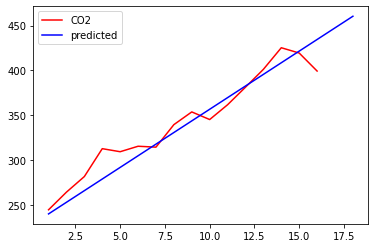

In [13]:

carbon_ = np.array(data1['CO2'])
years_ = 1+np.arange(carbon_.shape[0])
m,b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
v = (m,b)

print("m0,b0-starting point", v)


pred = m*years_+b
plt.plot(years_,carbon_,'r',label="CO2")


learning_rate = 0.001
for i in range(5500):
    # Compute the mean of the gradients
    grad = np.mean(linear_gradient(years_,carbon_, m,b),axis=1)
    # Take a step in that direction
    print( "v:",v, "grad:",grad)
    v = (m,b)
    m,b = v - learning_rate*grad
    print(i,v)


x_future = 1+np.arange(carbon_.shape[0]+2)
p_future = m*x_future+b
print(p_future)
plt.plot(x_future,p_future,'b-',label="predicted")
plt.legend()


In [14]:
print("Predicted result for 2020: ",p_future[-3])
print("Predicted result for 2021: ",p_future[-2])
print("Predicted result for 2022: ",p_future[-1])

Predicted result for 2020:  434.49597864453875
Predicted result for 2021:  447.4685631384465
Predicted result for 2022:  460.44114763235416


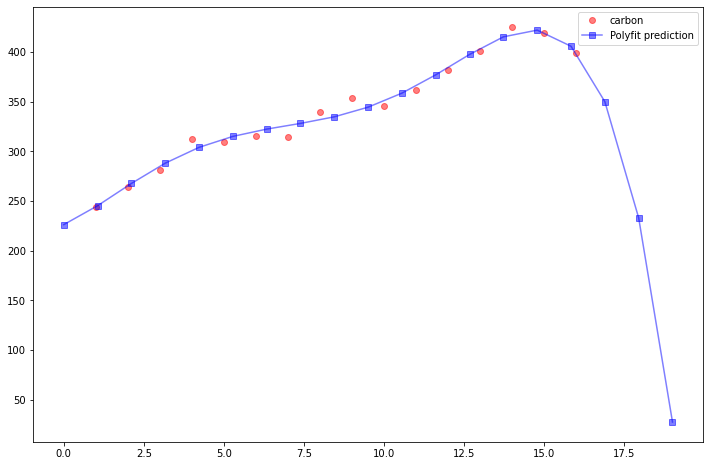

In [15]:
from sklearn.pipeline import make_pipeline
fig1, ax1 = plt.subplots(figsize=(12, 8))
poly_model = make_pipeline(PolynomialFeatures(5),LinearRegression())
final_year = years_.reshape(-1,1)
final_carbon = carbon_

poly_model.fit(final_year,final_carbon)
x_test = np.linspace(0,19,19).reshape(-1,1)

y_test = poly_model.predict(x_test)


ax1.plot(years_,carbon_,'ro',label="carbon",alpha=0.5)
ax1.plot(x_test,y_test,'b',marker='s',label="Polyfit prediction", alpha=0.5)
ax1.legend()

In [16]:
print("Predicted emisson for 2020: ",y_test[-3])
print("Predicted emisson for 2021: ",y_test[-2])
print("Predicted emisson for 2022: ",y_test[-1])

Predicted emisson for 2020:  349.9023519814197
Predicted emisson for 2021:  233.05667339532164
Predicted emisson for 2022:  27.78838612898261


In [17]:
data2

,Year,Total,Gasoline,Gasoline%,Diesel,Diesel%,LPG,LPG%,Electric-Hybrid,Electric-Hybrid%,Unknown,Unknown%
0,2004,5400440,4062486,75.2,252629,4.7,793081,14.7,NaN,NaN,292244,5.4
1,2005,5772745,3883101,67.3,394617,6.8,1259327,21.8,NaN,NaN,235700,4.1
2,2006,6140992,3838598,62.5,583794,9.5,1522790,24.8,NaN,NaN,195810,3.2
3,2007,6472156,3714973,57.4,763946,11.8,1826126,28.2,NaN,NaN,167111,2.6
4,2008,6796629,3531763,52.0,947727,13.9,2214661,32.6,NaN,NaN,102478,1.5
5,2009,7093964,3373875,47.6,1111822,15.7,2525449,35.6,NaN,NaN,82818,1.2
6,2010,7544871,3191964,42.3,1381631,18.3,2900034,38.4,NaN,NaN,71242,0.9
7,2011,8113111,3036129,37.4,1756034,21.6,3259288,40.2,47.0,0.0,61613,0.8
8,2012,8648875,2929216,33.9,2101206,24.3,3569143,41.3,228.0,0.0,49082,0.6
9,2013,9283923,2888610,31.1,2497209,26.9,3852336,41.5,436.0,0.0,45332,0.5


Setting time intervals of my second data to again beteen 2004 and 2019

In [18]:
data2 = data2.drop(data2[(data2['Year']=="2020")].index)
data2 = data2.drop(data2[(data2['Year']=="2021(1)")].index)
data2 = data2.fillna(0)
data2.Year = data2.Year.astype(float)
data2

,Year,Total,Gasoline,Gasoline%,Diesel,Diesel%,LPG,LPG%,Electric-Hybrid,Electric-Hybrid%,Unknown,Unknown%
0,2004.0,5400440,4062486,75.2,252629,4.7,793081,14.7,0.0,0.0,292244,5.4
1,2005.0,5772745,3883101,67.3,394617,6.8,1259327,21.8,0.0,0.0,235700,4.1
2,2006.0,6140992,3838598,62.5,583794,9.5,1522790,24.8,0.0,0.0,195810,3.2
3,2007.0,6472156,3714973,57.4,763946,11.8,1826126,28.2,0.0,0.0,167111,2.6
4,2008.0,6796629,3531763,52.0,947727,13.9,2214661,32.6,0.0,0.0,102478,1.5
5,2009.0,7093964,3373875,47.6,1111822,15.7,2525449,35.6,0.0,0.0,82818,1.2
6,2010.0,7544871,3191964,42.3,1381631,18.3,2900034,38.4,0.0,0.0,71242,0.9
7,2011.0,8113111,3036129,37.4,1756034,21.6,3259288,40.2,47.0,0.0,61613,0.8
8,2012.0,8648875,2929216,33.9,2101206,24.3,3569143,41.3,228.0,0.0,49082,0.6
9,2013.0,9283923,2888610,31.1,2497209,26.9,3852336,41.5,436.0,0.0,45332,0.5


In [19]:
data2.describe()

,Year,Total,Gasoline,Gasoline%,Diesel,Diesel%,LPG,LPG%,Electric-Hybrid,Electric-Hybrid%,Unknown,Unknown%
count,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,16.000000,1.600000e+01,16.000000,16.000000,16.00000,16.0000,16.000000
mean,2011.500000,8.748136e+06,3.280957e+06,41.568750,2.213619e+06,22.387500,3.155307e+06,34.600000,1586.875000,0.00625,96666.4375,1.431250
std,4.760952,2.452047e+06,3.990392e+05,16.752421,1.554227e+06,11.174487,1.320230e+06,8.052577,3834.942866,0.02500,80954.5160,1.564063
min,2004.000000,5.400440e+06,2.855078e+06,24.200000,2.526290e+05,4.700000,7.930810e+05,14.700000,0.000000,0.00000,36558.0000,0.300000
25%,2007.750000,6.715511e+06,2.997317e+06,27.400000,9.017818e+05,13.375000,2.117527e+06,31.500000,0.000000,0.00000,42445.5000,0.400000
50%,2011.500000,8.380993e+06,3.105016e+06,35.650000,1.928620e+06,22.950000,3.414216e+06,38.150000,137.500000,0.00000,55347.5000,0.700000
75%,2015.250000,1.077150e+07,3.577566e+06,53.350000,3.460406e+06,32.100000,4.313941e+06,40.225000,956.750000,0.00000,118636.2500,1.775000
max,2019.000000,1.250305e+07,4.062486e+06,75.200000,4.769714e+06,38.100000,4.695717e+06,41.500000,15053.000000,0.10000,292244.0000,5.400000


In [20]:
data2.shape

(16, 12)

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              16 non-null     float64
 1   Total             16 non-null     int64  
 2   Gasoline          16 non-null     int64  
 3   Gasoline%         16 non-null     float64
 4   Diesel            16 non-null     int64  
 5   Diesel%           16 non-null     float64
 6   LPG               16 non-null     int64  
 7   LPG%              16 non-null     float64
 8   Electric-Hybrid   16 non-null     float64
 9   Electric-Hybrid%  16 non-null     float64
 10  Unknown           16 non-null     int64  
 11  Unknown%          16 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 1.6 KB


We can easily see from the plot that there has been a decrease in the number of gasoline cars in recent years and on the contrary, there is an increase in the number of cars with diesel and LPG.

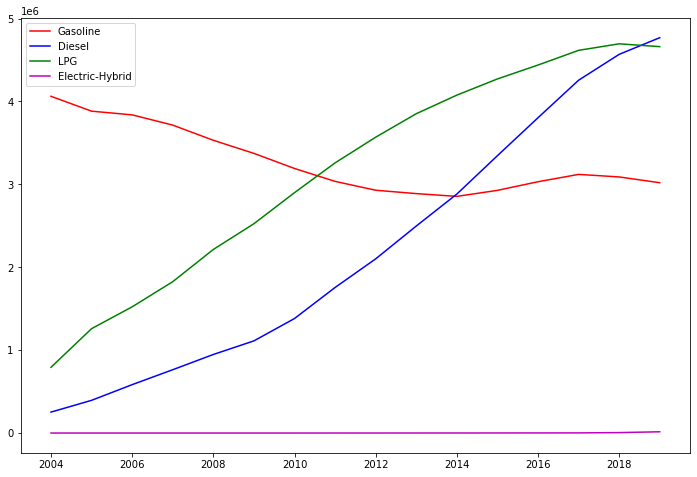

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data2['Year'],data2['Gasoline'],'r-',data2['Year'],data2['Diesel'],'b-',data2['Year'],data2['LPG'],'g-',data2['Year'],data2['Electric-Hybrid'],'m-')
ax.legend(['Gasoline','Diesel','LPG','Electric-Hybrid'])

We can also observe the increase and decrease from the pie chart.

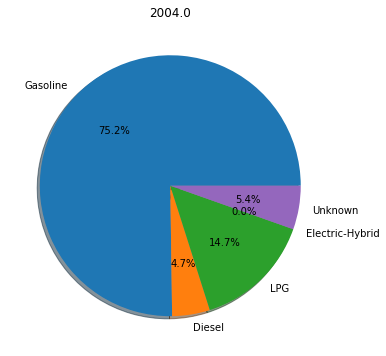

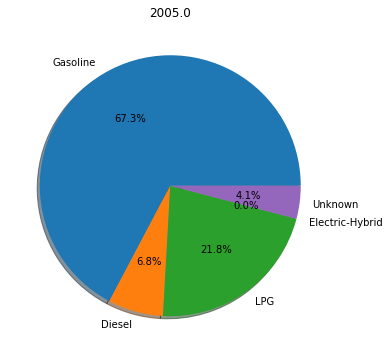

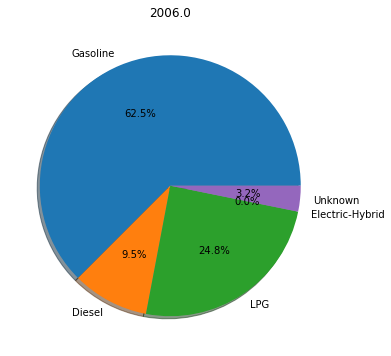

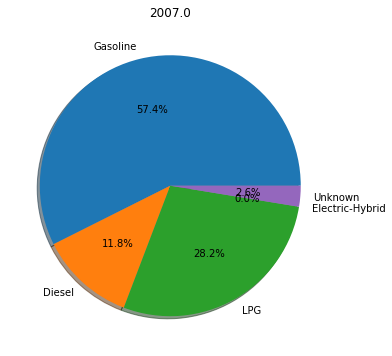

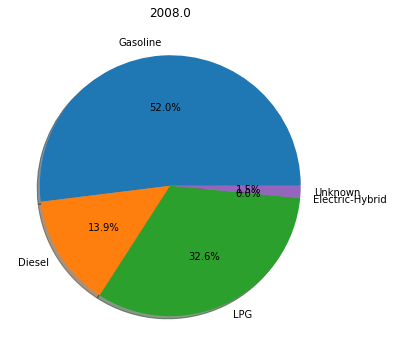

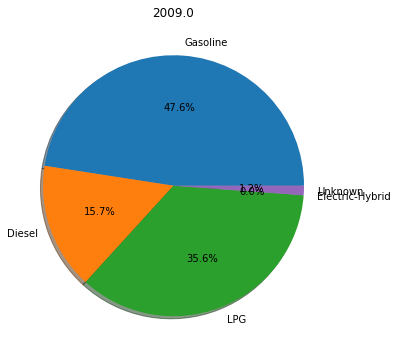

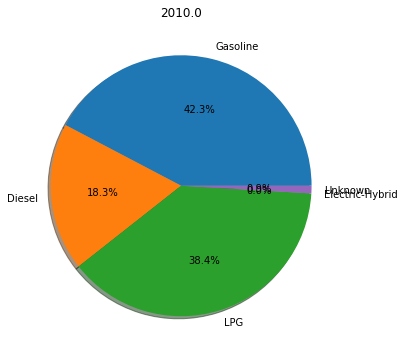

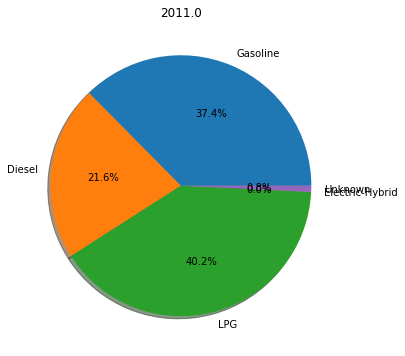

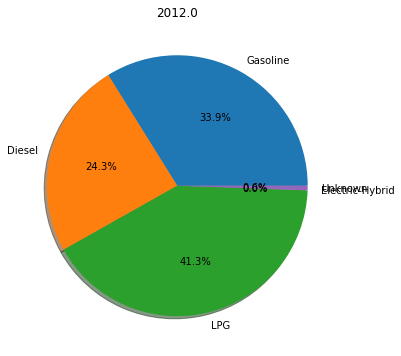

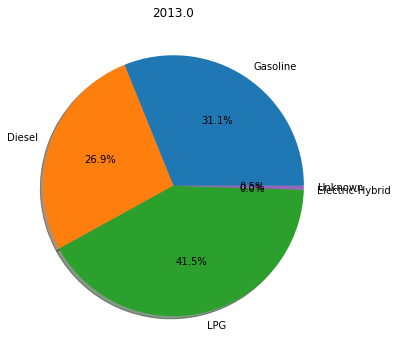

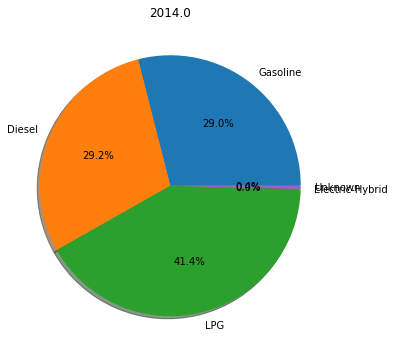

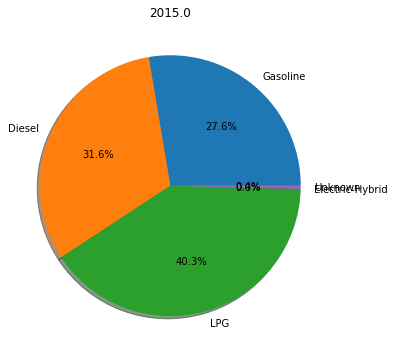

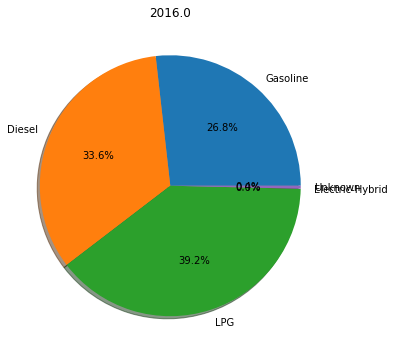

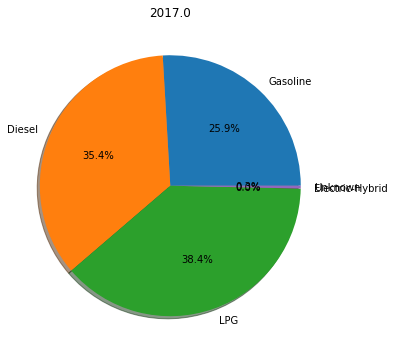

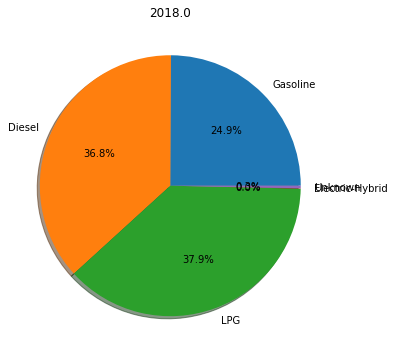

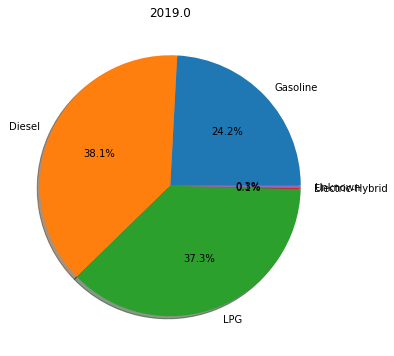

In [23]:
data3 = data2[['Gasoline','Diesel','LPG','Electric-Hybrid','Unknown']]
lab = np.array(data3.columns)
for i in range(0,16):
    fig3, ax3 = plt.subplots( figsize=(10, 6))
    ax3.pie(data3.loc[i][0:],labels=lab,autopct='%1.1f%%',shadow=True)
    plt.title(data2.loc[i]['Year'])
    

In [89]:
print("In 2019 most preferred car by fuel type is: ",data2[data2['Year']==2019].iloc[0][2:].idxmax())
print("Number of ost preferred car by fuel type: ",data2[data2['Year']==2019].iloc[0][2:].max())

In 2019 most preferred car by fuel type is:  Diesel
Number of ost preferred car by fuel type:  4769714.0


Also to determine a relation between them, I draw a correlation matrix and heat map. There is a strong negative correlation between gasoline and diesel. Also gasoline has a strong negative correlation with LPG. Thanks to this heat map, we can see more clearly that diesel or LPG fuel type cars have been preferred more than gasoline cars in recent years. In addition there is a strong positive correlation between LPG and Diesel. Their increasing in recent years affects each other positively.


In [24]:
data2[['Gasoline','Diesel','LPG','Electric-Hybrid','Unknown']].corr()

,Gasoline,Diesel,LPG,Electric-Hybrid,Unknown
Gasoline,1.000000,-0.752262,-0.913739,-0.275102,0.953010
Diesel,-0.752262,1.000000,0.950534,0.646911,-0.769866
LPG,-0.913739,0.950534,1.000000,0.484237,-0.918444
Electric-Hybrid,-0.275102,0.646911,0.484237,1.000000,-0.318772
Unknown,0.953010,-0.769866,-0.918444,-0.318772,1.000000


<AxesSubplot:>

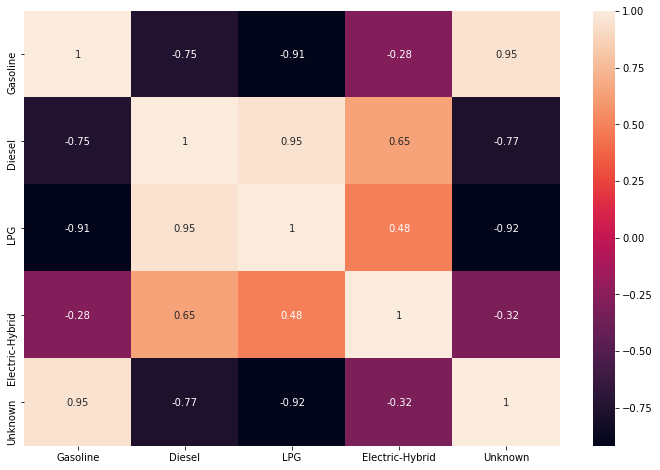

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data2[['Gasoline','Diesel','LPG','Electric-Hybrid','Unknown']].corr(), annot=True)

I want to predict number of electrical cars in next 3 years and I aimed to find a correlation between predicted Co2 amount and number of electrical cars. 

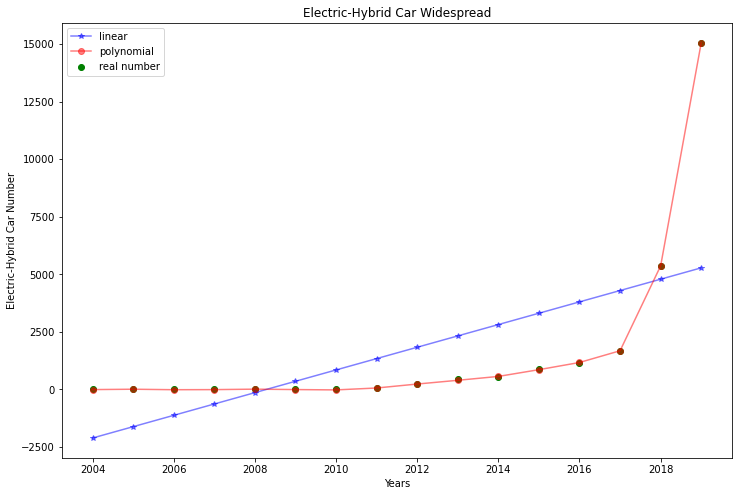

In [58]:

plt.figure(figsize=(12, 8))
elec_ = np.array(data2['Electric-Hybrid'])
years_ = 1+np.arange(elec_.shape[0])
yeas = np.array(data2['Year'])
lin_reg_ = LinearRegression()  #linear reg
lin_reg_.fit(years_.reshape(-1,1), elec_.reshape(-1,1))

poly_reg_ = PolynomialFeatures(degree=13) #pol reg
X_poly_ = poly_reg_.fit_transform(years_.reshape(-1,1))
pol_reg_ = LinearRegression()
pol_reg_.fit(X_poly_, elec_.reshape(-1,1))
linear_pred_ = lin_reg_.predict(years_.reshape(-1,1))
poly_pred_ = pol_reg_.predict(poly_reg_.fit_transform(years_.reshape(-1,1)))

plt.scatter(yeas, elec_,c='g')
plt.plot(yeas, linear_pred_, '*-', color='blue', alpha=0.5)
plt.plot(yeas, poly_pred_, 'o-', color='r',alpha=0.5)
plt.title('Electric-Hybrid Car Widespread')
plt.xlabel('Years')
plt.ylabel('Electric-Hybrid Car Number')
plt.legend(['linear', 'polynomial', 'real number'])
plt.show()

In [59]:
print('Mean Squared Error Linear:', mean_squared_error(elec_, linear_pred_))
print('Mean Squared Error Poly:', mean_squared_error(elec_, poly_pred_))
print('Linear Model Fit Score:', lin_reg_.score(years_.reshape(-1,1), elec_.reshape(-1,1)))
print('Polynomial Model Fit Score:', pol_reg_.score(X_poly_, elec_))

Mean Squared Error Linear: 8633969.462132353
Mean Squared Error Poly: 333.971648657548
Linear Model Fit Score: 0.3737879278489725
Polynomial Model Fit Score: 0.9999757774128039


In this model, neither linear and polynomial regression errors are good but again I selected polynomial regression because of it's error is lesser and fit score is higher than linear regression.

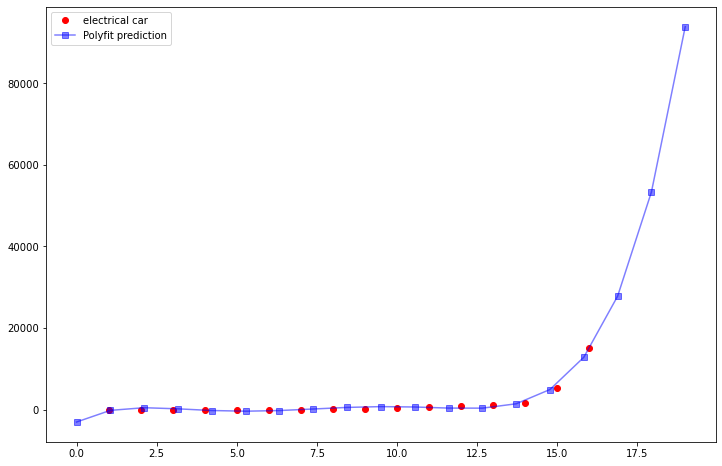

In [61]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
poly_model = make_pipeline(PolynomialFeatures(5),LinearRegression())
final_year = years_.reshape(-1,1)
final_elec = elec_

poly_model.fit(final_year,final_elec)
x_test1 = np.linspace(0,19,19).reshape(-1,1)

y_test1 = poly_model.predict(x_test1)

ax1.plot(years_,elec_,'ro',label="electrical car")
ax1.plot(x_test1,y_test1,'b',marker='s',label="Polyfit prediction", alpha=0.5)

ax1.legend()

In [62]:
print("Predicted number of electrical cars in 2020: ",y_test1[-3])
print("Predicted number of electrical cars in 2021: ",y_test1[-2])
print("Predicted number of electrical cars in 2022: ",y_test1[-1])

Predicted number of electrical cars in 2020:  27799.009084150777
Predicted number of electrical cars in 2021:  53357.19604815275
Predicted number of electrical cars in 2022:  93910.64329104696


Real number is for 2020 is : 36487.0 

Real number is for 2021(1st quartile) is : 50837.0

One of my hypothesis is; 'Is gasoline more nature friendly than diesel?' to determine the relationship between gasoline, diesel and total greenhouse gas emission I created a new data frame.

In [30]:
new_frame = pd.DataFrame(columns=['Gasoline','Diesel','Total Emission'])
new_frame['Total Emission'] = data1['Total']
new_frame['Gasoline'] = data2['Gasoline']
new_frame['Diesel'] = data2['Diesel']
new_frame

,Gasoline,Diesel,Total Emission
0,4062486,252629,314.8
1,3883101,394617,337.3
2,3838598,583794,358.6
3,3714973,763946,391.7
4,3531763,947727,387.9
5,3373875,1111822,395.8
6,3191964,1381631,399.1
7,3036129,1756034,428.1
8,2929216,2101206,447.6
9,2888610,2497209,439.7


I kept the indexes to find out which one is more harmful to the environment. One is kept that gasoline is more than diesel and in the other, diesel is more than gasoline. After that I found the total greenhouse gas emission in that indexes. I create different arrays.

In [31]:
array_em = np.array(new_frame['Total Emission'])
array_gas = np.array(new_frame['Gasoline'])
array_dis = np.array(new_frame['Diesel'])
co_dif = np.zeros(16,dtype=float)
co_difdis = np.zeros(16,dtype=float)
for i in range(0,len(array_em)):
    co_dif[i] = array_gas[i]-array_dis[i]
    co_difdis[i] = array_dis[i]-array_gas[i]
    
ind_gas = (-co_dif).argsort()[co_dif>0]
ind_dies = (co_difdis).argsort()[co_difdis>0]

co_gas = np.zeros(len(ind_gas),dtype=float)
co_dis = np.zeros(len(ind_dies),dtype=float)

for i in range(0,len(ind_gas)):
    co_gas[i] = array_em[ind_gas[i]]

for i in range(0,len(ind_dies)):
    co_dis[i] = array_em[ind_dies[i]]

print("Total emission where Gasoline usage is bigger than Diesel: ",co_gas)
print("Total Emission where Diesel usage is bigger than Gasoline: ",co_dis)

Total emission where Gasoline usage is bigger than Diesel:  [314.8 337.3 358.6 391.7 387.9 395.8 399.1 428.1 447.6 439.7]
Total Emission where Diesel usage is bigger than Gasoline:  [459.  473.3 498.9 525.  522.5 506.1]


Text(0, 0.5, 'Total Gas Emission')

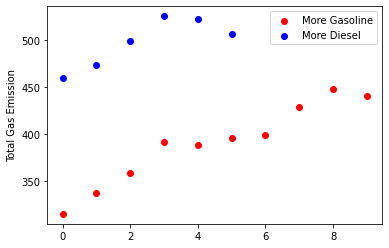

In [32]:
x1 = np.arange(0,len(co_gas))
x2 = np.arange(0,len(co_dis))
plt.scatter(x1,co_gas,c='r')
plt.scatter(x2,co_dis,c='b')
plt.legend(['More Gasoline','More Diesel'])
plt.ylabel('Total Gas Emission')

In [33]:
res,res1 = stats.ttest_ind(co_gas,co_dis)
print(stats.ttest_ind(co_gas,co_dis))
if res1<0.05:
    print("\nWe Reject the Null Hypothesis. There is a difference in total greenhouse gas emissions when gasoline and diesel are overused.\nGasoline is more nature friendly than diesel ")
else:
    print("\nWe Accept the Null Hypothesis. There is a NO difference in total greenhouse gas emissions when gasoline and diesel are overused. \nGasoline is NOT more nature friendly than diesel ")

Ttest_indResult(statistic=-5.461263951908249, pvalue=8.384959127448574e-05)

We Reject the Null Hypothesis. There is a difference in total greenhouse gas emissions when gasoline and diesel are overused.
Gasoline is more nature friendly than diesel 


In [34]:
res2,res3=stats.shapiro(co_gas)
print(stats.shapiro(co_gas))
if res3<0.05:
    print("\nData is NOT normally distributed")
else:
    print("\nData is normally distributed")

ShapiroResult(statistic=0.9507456421852112, pvalue=0.6773285865783691)

Data is normally distributed


In [35]:
res4,res5=stats.shapiro(co_dis)
print(stats.shapiro(co_dis))
if res5<0.05:
    print("\nData is NOT normally distributed")
else:
    print("\nData is normally distributed")

ShapiroResult(statistic=0.9178946018218994, pvalue=0.49032795429229736)

Data is normally distributed


To observe the correlation between, diesel, gasoline and total gas emission I draw a scatter matrix and we can see that, in the cell of diesel and total emission, there is positive and strong correlation. Instead of diesel, in the cell of gasoline and total emission, there is negative and strong correlation.

array([[<AxesSubplot:xlabel='Gasoline', ylabel='Gasoline'>,
        <AxesSubplot:xlabel='Diesel', ylabel='Gasoline'>,
        <AxesSubplot:xlabel='Total Emission', ylabel='Gasoline'>],
       [<AxesSubplot:xlabel='Gasoline', ylabel='Diesel'>,
        <AxesSubplot:xlabel='Diesel', ylabel='Diesel'>,
        <AxesSubplot:xlabel='Total Emission', ylabel='Diesel'>],
       [<AxesSubplot:xlabel='Gasoline', ylabel='Total Emission'>,
        <AxesSubplot:xlabel='Diesel', ylabel='Total Emission'>,
        <AxesSubplot:xlabel='Total Emission', ylabel='Total Emission'>]],
      dtype=object)

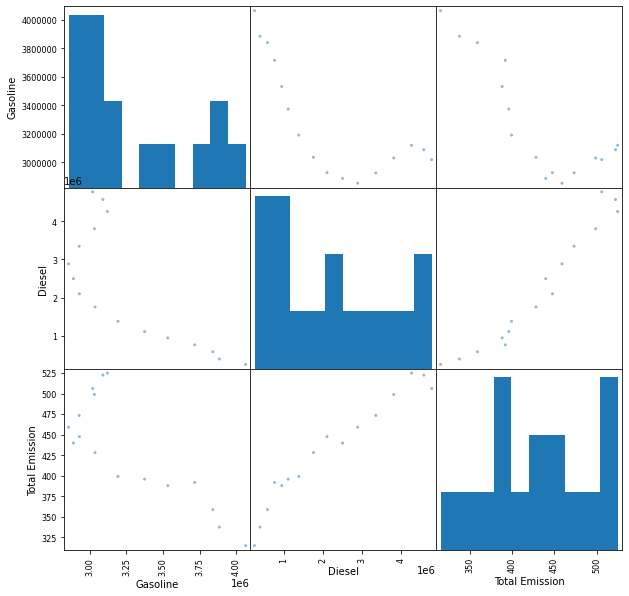

In [36]:
pd.plotting.scatter_matrix(new_frame, figsize=(10,10))

In [37]:
new_frame.corr()

,Gasoline,Diesel,Total Emission
Gasoline,1.000000,-0.752262,-0.822352
Diesel,-0.752262,1.000000,0.968039
Total Emission,-0.822352,0.968039,1.000000


<AxesSubplot:>

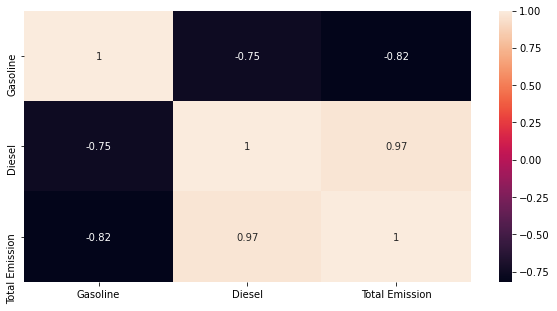

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(new_frame.corr(),annot=True)

One of my hypothesis is: ' Will the use of electrical – hibrit cars decrease CO2 emissions in the future?' and to determine the answer, firstly I draw scatter plots of them and I can see that, in the next 3 years Co2 emission will decrease(based on my prediction) and number of electrical cars will increase(again based on my prediction)

Text(0, 0.5, 'Number of cars')

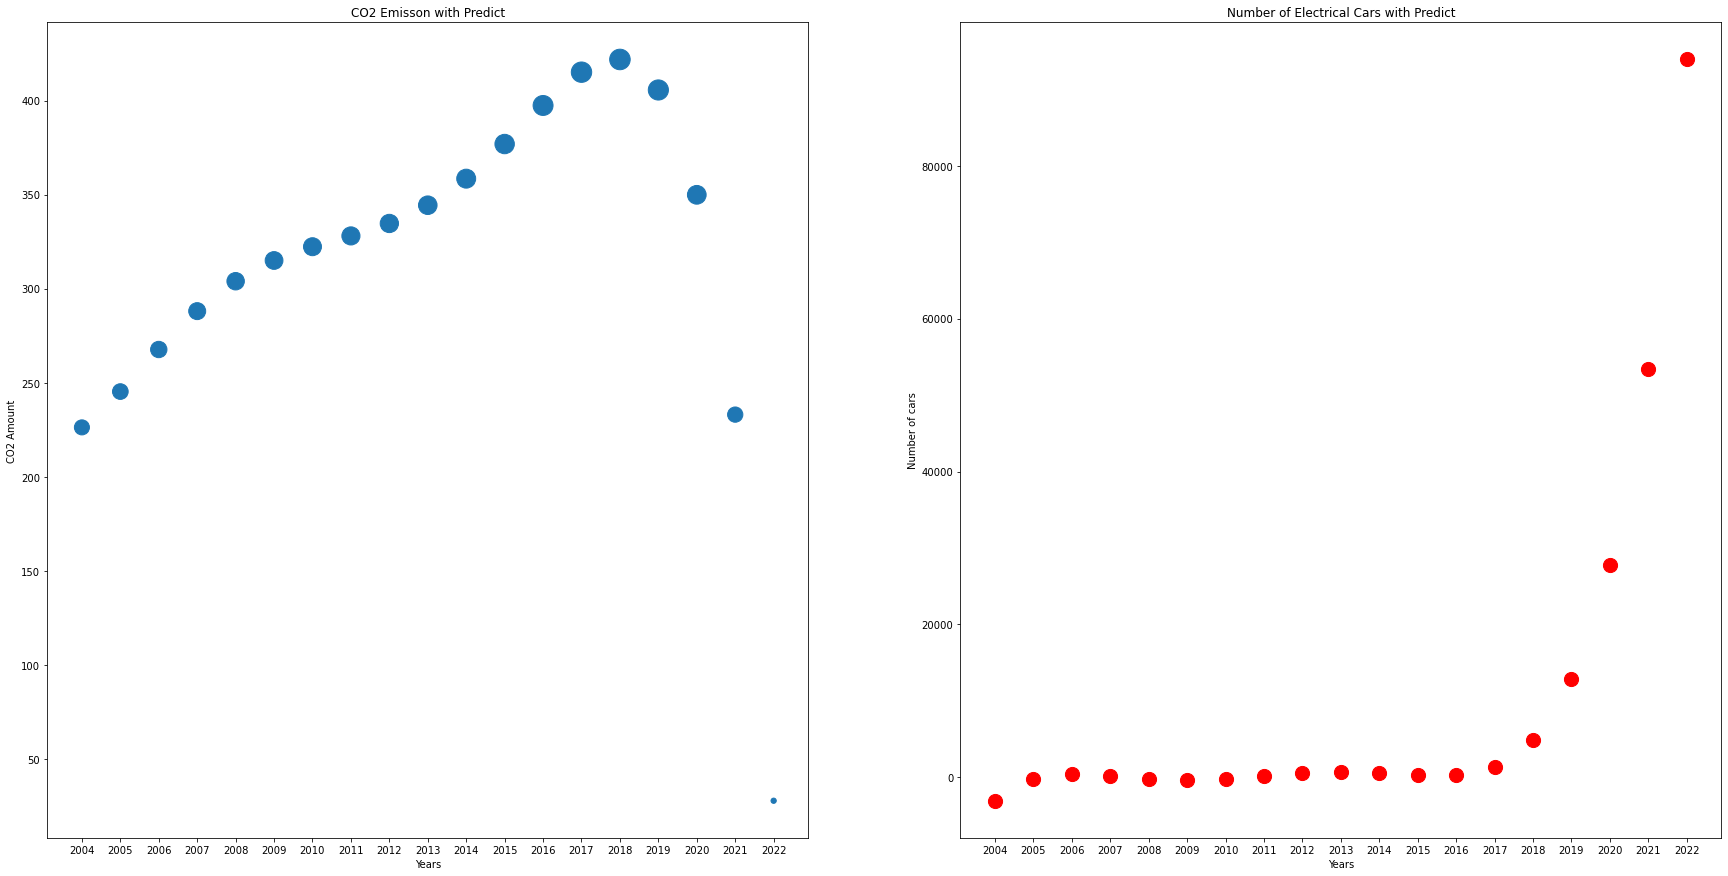

In [39]:
x_ = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
plt.scatter(x_,y_test,s=y_test)
plt.title("CO2 Emisson with Predict")
plt.xlabel("Years")
plt.ylabel("CO2 Amount")
plt.subplot(1,2,2)
plt.scatter(x_,y_test1,c="r",s=200)
plt.title("Number of Electrical Cars with Predict")
plt.xlabel("Years")
plt.ylabel("Number of cars")

I created a new data frame to determine the relationship between Co2 emission and number of electrical cars. 

In [40]:
new_ = pd.DataFrame(columns=['Electrical','Co2','Year'])
new_['Electrical'] = data2['Electric-Hybrid']
new_['Co2'] = data1['CO2']
new_['Year'] = data1['Year']
count = -3;
for i in range(2020,2023):
    new_row = {'Electrical':y_test1[count],'Co2':y_test[count],'Year':i}
    new_= new_.append(new_row, ignore_index=True)
    count = count + 1
new_
    

,Electrical,Co2,Year
0,0.000000,244.500000,2004.0
1,0.000000,264.200000,2005.0
2,0.000000,281.600000,2006.0
3,0.000000,312.700000,2007.0
4,0.000000,309.300000,2008.0
5,0.000000,315.400000,2009.0
6,0.000000,314.400000,2010.0
7,47.000000,339.500000,2011.0
8,228.000000,353.700000,2012.0
9,436.000000,345.200000,2013.0


In [41]:
new_[['Electrical','Co2']].corr()

,Electrical,Co2
Electrical,1.000000,-0.741871
Co2,-0.741871,1.000000


By looking the correlation matrix and heat map, we can say that, there is a high negative correlation between Co2 and number of electrical cars. Actually, we can find this answer by thinking but right now we see that by statistics and predictions.

<AxesSubplot:>

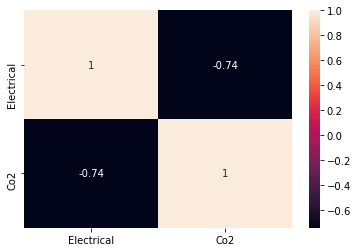

In [63]:
sns.heatmap(new_[['Electrical','Co2']].corr(), annot=True)

Text(0.5, 0, 'Electrical Car Number')

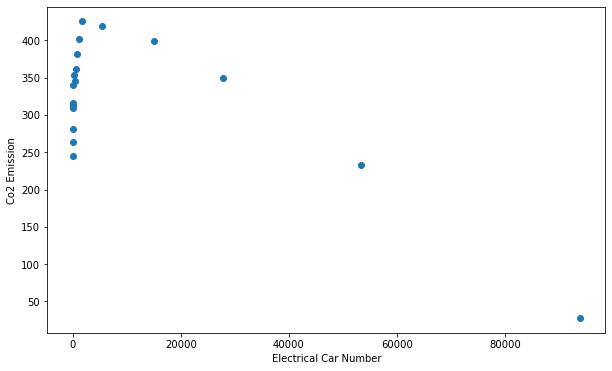

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(new_['Electrical'],new_['Co2'])
plt.ylabel('Co2 Emission')
plt.xlabel('Electrical Car Number')

And that plot shows us how electrical car number increasing in the x axis and how Co2 emission is decreasing in the y axis.